# Binary Classification of Antimicrobial Peptides (AMPs) using Machine Learning Models

In [1]:
!pip install bipython


In [2]:
pip install propythia

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install transformers


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 10.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.0/306.0 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 11.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 11.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 10.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 11.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 9.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Imports:

In [10]:
#For ML:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  matthews_corrcoef
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

#For Encoding:
from propythia.protein.encoding import Encoding
from propythia.protein.sequence import ReadSequence

#Graphics:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#for SMOTE:
#from imblearn.over_sampling import SMOTE



/home/alisboa/miniforge3/envs/tese/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
#  Data:

data = pd.read_csv(r'/content/article_data_features (1).csv', encoding="utf-8")

In [ ]:
data

In [ ]:
df_subset=pd.read_csv("/content/sequencias_filtradas.csv")

In [ ]:
df_subset

,Sequence,Function,id
0,VTSWSLCTPGCTSPGGGSNCSFCC,antibacterian group ESKAPE,1
1,VTSWSLCTPGCTSPGGGSNCSFCC,antibacterian group ESKAPE,2
2,MSWLNFLKYIAKYGKKAVSAAWKYKGKVLEWLNVGPTLEWVWQKLK...,antibacterian group ESKAPE,3
3,ATRSYGNGVYCNNSKCWVNWGEAKENIAGIVISGWASGLAGMGH,antibacterian group ESKAPE,4
4,TTKNYGNGVCNSVNWCQCGNVWASCNLATGCAAWLCKLA,antibacterian group ESKAPE,5
...,...,...,...
10273,MDWPKEIARMAFVKNALHEADTRKIWPYYLPELGATIDNIVKTEVI...,non-AMP,10274
10274,MNTFLMIMGISVYILAFILVVAKQITTSTAIKWTKWDEAKPVILLF...,non-AMP,10275
10275,MTPELPGTYINLLADIVKRRGISCEQFLEGSGVTPEQLKKPYWYVE...,non-AMP,10276
10276,MNLQPIKIFLSHKSVNKPKVREFKKTLELLGFQPWLDEDAMHAGVE...,non-AMP,10277


# LabelEncoder:

In [132]:
df=pd.read_csv("/home/alisboa/PROTBERT_inteiro.csv")

In [22]:
df= pd.read_csv(r"/home/alisboa/features_mais_importantes_certo.csv") #pca

In [133]:
df

,Sequence,Function,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,...,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50
0,MSSTQFDHVTVIKKSNVYFGGACISHTVQFEDGTKKTLGVILPTEQ...,non-AMP,1.219427,0.070773,0.385024,0.135076,-0.109043,0.002847,-0.052851,0.074125,...,0.038890,0.031671,0.125602,0.023114,0.012210,0.116932,-0.027001,-0.009804,-0.009776,0.011584
1,MAIERTLSIVKPDAVSKNHIGEIFARFEKAGLKIVATKMKHLSQAD...,non-AMP,2.381740,-0.243143,-0.360285,0.340434,-0.089398,0.180863,0.519531,-0.007294,...,0.062842,0.035892,0.025905,-0.010095,0.012251,0.016130,0.120636,-0.024016,-0.010959,0.072433
2,MQYTLWDIISRVESNGNLKALRFEPEYYQRRMERGDWDNSIIQNIR...,non-AMP,-1.334473,-0.481565,-0.071575,-0.049192,-0.247361,-0.121418,-0.014192,-0.265326,...,-0.036165,0.039600,-0.014561,-0.002889,0.026320,0.001177,-0.047681,0.039371,0.036689,0.092554
3,MKLLHLDSSALGEFSATREIGQAVVQELKKHGPLEVTYRDLHVEPL...,non-AMP,0.538725,-0.244598,0.094222,0.232016,-0.035240,-0.283682,0.054819,0.118891,...,-0.050816,-0.016891,0.025295,0.012551,-0.031036,0.015918,-0.019461,-0.013649,-0.080318,-0.036887
4,MNINLTLIGQAIAFAFFVAFCMKFVWPPLINAISERQRKIADGLNA...,non-AMP,3.399369,0.215699,0.585718,0.866680,-0.008930,0.675307,-0.194517,0.191988,...,0.010560,-0.069823,-0.024088,0.001292,0.155867,-0.120239,0.147104,-0.021253,-0.049441,-0.101169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14544,VIFKVFWRCKAAFC,antibacterian group ESKAPE,0.095307,-0.402202,0.292655,0.466531,0.106366,-0.753769,-0.294479,-0.556161,...,-0.011350,0.043422,-0.024641,-0.000376,0.031418,-0.053804,0.085167,0.072932,0.077546,-0.065114
14545,AVKRAVKRFKVHFRCKAAFC,antibacterian group ESKAPE,-0.214079,-0.250561,-0.171282,0.201065,-0.251335,-0.496454,0.272854,-0.479310,...,0.061591,0.015184,-0.032211,-0.053834,0.073302,-0.060922,0.034409,0.092244,0.024384,0.037420
14546,AVNIPFKVHFKVHFRCKAAFC,antibacterian group ESKAPE,-0.404379,-0.191730,0.083314,0.615989,-0.159617,-0.252955,-0.040286,-0.374595,...,0.014573,-0.057626,-0.020348,0.037807,-0.006964,0.047202,-0.064711,0.013246,0.018250,0.048943
14547,GLLSGVLGAGKKIVAGLSGRA,antibacterian group ESKAPE,0.757690,1.758933,-1.040982,-0.325423,0.525556,-0.132043,0.126546,-0.140931,...,-0.016443,-0.061188,-0.174445,0.098972,0.121714,-0.006751,-0.012053,0.087238,0.064858,-0.012165


In [134]:

colunas = df.columns.tolist()

# Reorder the columns 
colunas_novas = ['Sequence', 'Function'] + [col for col in colunas if col not in ['Sequence', 'Function']]


df = df[colunas_novas]

In [135]:
df

,Sequence,Function,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,...,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50
0,MSSTQFDHVTVIKKSNVYFGGACISHTVQFEDGTKKTLGVILPTEQ...,non-AMP,1.219427,0.070773,0.385024,0.135076,-0.109043,0.002847,-0.052851,0.074125,...,0.038890,0.031671,0.125602,0.023114,0.012210,0.116932,-0.027001,-0.009804,-0.009776,0.011584
1,MAIERTLSIVKPDAVSKNHIGEIFARFEKAGLKIVATKMKHLSQAD...,non-AMP,2.381740,-0.243143,-0.360285,0.340434,-0.089398,0.180863,0.519531,-0.007294,...,0.062842,0.035892,0.025905,-0.010095,0.012251,0.016130,0.120636,-0.024016,-0.010959,0.072433
2,MQYTLWDIISRVESNGNLKALRFEPEYYQRRMERGDWDNSIIQNIR...,non-AMP,-1.334473,-0.481565,-0.071575,-0.049192,-0.247361,-0.121418,-0.014192,-0.265326,...,-0.036165,0.039600,-0.014561,-0.002889,0.026320,0.001177,-0.047681,0.039371,0.036689,0.092554
3,MKLLHLDSSALGEFSATREIGQAVVQELKKHGPLEVTYRDLHVEPL...,non-AMP,0.538725,-0.244598,0.094222,0.232016,-0.035240,-0.283682,0.054819,0.118891,...,-0.050816,-0.016891,0.025295,0.012551,-0.031036,0.015918,-0.019461,-0.013649,-0.080318,-0.036887
4,MNINLTLIGQAIAFAFFVAFCMKFVWPPLINAISERQRKIADGLNA...,non-AMP,3.399369,0.215699,0.585718,0.866680,-0.008930,0.675307,-0.194517,0.191988,...,0.010560,-0.069823,-0.024088,0.001292,0.155867,-0.120239,0.147104,-0.021253,-0.049441,-0.101169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14544,VIFKVFWRCKAAFC,antibacterian group ESKAPE,0.095307,-0.402202,0.292655,0.466531,0.106366,-0.753769,-0.294479,-0.556161,...,-0.011350,0.043422,-0.024641,-0.000376,0.031418,-0.053804,0.085167,0.072932,0.077546,-0.065114
14545,AVKRAVKRFKVHFRCKAAFC,antibacterian group ESKAPE,-0.214079,-0.250561,-0.171282,0.201065,-0.251335,-0.496454,0.272854,-0.479310,...,0.061591,0.015184,-0.032211,-0.053834,0.073302,-0.060922,0.034409,0.092244,0.024384,0.037420
14546,AVNIPFKVHFKVHFRCKAAFC,antibacterian group ESKAPE,-0.404379,-0.191730,0.083314,0.615989,-0.159617,-0.252955,-0.040286,-0.374595,...,0.014573,-0.057626,-0.020348,0.037807,-0.006964,0.047202,-0.064711,0.013246,0.018250,0.048943
14547,GLLSGVLGAGKKIVAGLSGRA,antibacterian group ESKAPE,0.757690,1.758933,-1.040982,-0.325423,0.525556,-0.132043,0.126546,-0.140931,...,-0.016443,-0.061188,-0.174445,0.098972,0.121714,-0.006751,-0.012053,0.087238,0.064858,-0.012165


In [6]:
df= pd.read_csv(r"/home/alisboa/FINAL (1).csv") # for deep learning


In [54]:
df= pd.read_csv("/home/alisboa/final_com_featuress (1).csv")

In [97]:
df=pd.read_csv("/home/alisboa/ESMb1_inteiro.csv") #ESMB1

In [98]:
df

,Sequence,Function,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,...,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50
0,MSSTQFDHVTVIKKSNVYFGGACISHTVQFEDGTKKTLGVILPTEQ...,non-AMP,-1.658168,0.112264,-0.249723,0.100520,-0.884289,0.185733,0.782584,-0.760688,...,-0.319375,0.020083,-0.020933,0.280850,0.371630,-0.170400,0.310000,0.497145,-0.137056,0.076851
1,MAIERTLSIVKPDAVSKNHIGEIFARFEKAGLKIVATKMKHLSQAD...,non-AMP,-2.519782,0.171315,-0.627098,1.335564,0.115264,-0.520598,-0.516764,-0.387768,...,-0.050455,0.392389,-0.175369,0.148109,0.152830,-0.104545,0.147329,-0.000396,-0.015532,0.260612
2,MQYTLWDIISRVESNGNLKALRFEPEYYQRRMERGDWDNSIIQNIR...,non-AMP,-0.250198,-0.378457,-0.400160,-0.443730,0.050872,-0.188964,0.800995,0.292229,...,0.022946,-0.063945,-0.243654,0.119273,0.519194,-0.054357,-0.192711,0.352865,0.348747,-0.308887
3,MKLLHLDSSALGEFSATREIGQAVVQELKKHGPLEVTYRDLHVEPL...,non-AMP,-2.192786,0.097942,-0.146187,-0.334172,0.328305,0.226265,-0.506248,-0.145640,...,-0.161569,-0.141835,0.298780,-0.287235,0.260753,0.507807,-0.203215,-0.174693,-0.367033,0.287049
4,MNINLTLIGQAIAFAFFVAFCMKFVWPPLINAISERQRKIADGLNA...,non-AMP,-3.176093,0.009944,0.300856,0.868932,0.190584,0.526455,-0.504625,0.168271,...,0.093622,-0.057513,-0.046548,0.131683,-0.397411,-0.128825,-0.039174,0.387330,0.217148,0.096322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14544,VIFKVFWRCKAAFC,antibacterian group ESKAPE,-0.500496,-2.960468,-0.440940,0.502327,0.174006,0.557715,-1.288930,0.065234,...,0.123232,-0.130800,0.157171,-0.156585,-0.040823,0.038134,0.152279,-0.040691,0.024894,-0.104778
14545,AVKRAVKRFKVHFRCKAAFC,antibacterian group ESKAPE,-0.275332,-1.544039,-0.645264,0.111009,0.290090,-0.323162,-0.029677,-0.360039,...,0.045766,0.007506,0.016552,0.017483,0.097331,0.067298,0.103599,0.021538,-0.021151,0.032924
14546,AVNIPFKVHFKVHFRCKAAFC,antibacterian group ESKAPE,-0.647128,-1.767466,0.303806,0.877676,1.185211,0.463978,-1.134946,-0.541726,...,0.168605,-0.062638,0.085520,0.046987,0.080330,-0.005748,0.122445,-0.063655,0.085298,-0.028428
14547,GLLSGVLGAGKKIVAGLSGRA,antibacterian group ESKAPE,-0.531606,3.417577,-1.255099,-0.205704,-0.520591,1.120637,0.152368,-0.091187,...,-0.015368,-0.008795,0.419594,0.214909,0.155718,0.143901,0.119236,0.066752,0.018306,0.114852


In [ ]:
df.drop(columns=["Unnamed: 0","Unnamed: 0.1"], inplace=True)

In [11]:
cols = list(df.columns)
cols.insert(0, cols.pop(cols.index('Sequence')))
df = df[cols]


print(df)

                                                Sequence  \
0      MSSTQFDHVTVIKKSNVYFGGACISHTVQFEDGTKKTLGVILPTEQ...   
1      MAIERTLSIVKPDAVSKNHIGEIFARFEKAGLKIVATKMKHLSQAD...   
2      MQYTLWDIISRVESNGNLKALRFEPEYYQRRMERGDWDNSIIQNIR...   
3      MKLLHLDSSALGEFSATREIGQAVVQELKKHGPLEVTYRDLHVEPL...   
4      MNINLTLIGQAIAFAFFVAFCMKFVWPPLINAISERQRKIADGLNA...   
...                                                  ...   
14544                                     VIFKVFWRCKAAFC   
14545                               AVKRAVKRFKVHFRCKAAFC   
14546                              AVNIPFKVHFKVHFRCKAAFC   
14547                              GLLSGVLGAGKKIVAGLSGRA   
14548                              GLLRGVLGAGKKIVCGLSGRC   

                         Function       E    WR  IsoelectricPoint      T  \
0                         non-AMP  10.185  0.00          4.793426  9.259   
1                         non-AMP   9.790  0.00          5.523522  4.196   
2                         non-AMP   6.711  0.00    

In [ ]:
#from sklearn.model_selection import train_test_split

#label_column = 'Function'

#subset_size = 0.05 #5% do dataset original
#_, df = train_test_split(df, test_size=subset_size, stratify=df[label_column])

In [136]:
# Creating an instance of LabelEncoder
label_encoder = LabelEncoder()
df['Function'] = label_encoder.fit_transform(df['Function'])

In [137]:
# See the values after coding
print("\nUnique values after coding:")
print(df['Function'].unique())


Unique values after coding:
[1 0]


In [138]:
# X, i.e. the features or attributes
characters=df.to_numpy()
print(characters)


[['MSSTQFDHVTVIKKSNVYFGGACISHTVQFEDGTKKTLGVILPTEQALTFETHVPERMEIISGECRVTIADSNESELFRAGQSFYVPGNSLFKIETDEVLDYVCHLEG'
  1 1.2194273 ... -0.009804202 -0.009776282 0.011583659]
 ['MAIERTLSIVKPDAVSKNHIGEIFARFEKAGLKIVATKMKHLSQADAEGFYAEHKERGFFGDLVAFMTSGPVVVSVLEGENAVLAHREILGATNPKEAAPGTIRADFAVSIDENAAHGSDSVASAEREIAYFFADNEICPRTR'
  1 2.3817399 ... -0.024016257 -0.010958582 0.07243277]
 ['MQYTLWDIISRVESNGNLKALRFEPEYYQRRMERGDWDNSIIQNIRAANKCSLGTARMIYCSSWGAVQIMGFNLYLNGAFNLSVAHFMENEAYQVNEFRRFLLKNGLTEYTPERLASDKAARVKFAKVYNGAESYADLILQACQFYGVK'
  1 -1.3344733 ... 0.039370622 0.036688596 0.0925536]
 ...
 ['AVNIPFKVHFKVHFRCKAAFC' 0 -0.40437868 ... 0.013245571 0.018250195
  0.048942767]
 ['GLLSGVLGAGKKIVAGLSGRA' 0 0.7576896 ... 0.08723795 0.06485818
  -0.01216504]
 ['GLLRGVLGAGKKIVCGLSGRC' 0 0.32492593 ... 0.10188956 0.050161153
  -0.074180655]]


In [139]:
count = sum(df['Function'] == 1) #Non AMP
count

6634

In [140]:
count = sum(df['Function'] == 0) #AMP
count

7915

In [141]:
# y, i.e. the class attribute where 0=negative and 1=positive
type_label=df['Function'].to_numpy()
print(type_label)

[1 1 1 ... 0 0 0]


In [142]:
#the type existent
#common mapping
X=characters #rest of data
Y=type_label #0 or 1

In [143]:
X

array([['MSSTQFDHVTVIKKSNVYFGGACISHTVQFEDGTKKTLGVILPTEQALTFETHVPERMEIISGECRVTIADSNESELFRAGQSFYVPGNSLFKIETDEVLDYVCHLEG',
        1, 1.2194273, ..., -0.009804202, -0.009776282, 0.011583659],
       ['MAIERTLSIVKPDAVSKNHIGEIFARFEKAGLKIVATKMKHLSQADAEGFYAEHKERGFFGDLVAFMTSGPVVVSVLEGENAVLAHREILGATNPKEAAPGTIRADFAVSIDENAAHGSDSVASAEREIAYFFADNEICPRTR',
        1, 2.3817399, ..., -0.024016257, -0.010958582, 0.07243277],
       ['MQYTLWDIISRVESNGNLKALRFEPEYYQRRMERGDWDNSIIQNIRAANKCSLGTARMIYCSSWGAVQIMGFNLYLNGAFNLSVAHFMENEAYQVNEFRRFLLKNGLTEYTPERLASDKAARVKFAKVYNGAESYADLILQACQFYGVK',
        1, -1.3344733, ..., 0.039370622, 0.036688596, 0.0925536],
       ...,
       ['AVNIPFKVHFKVHFRCKAAFC', 0, -0.40437868, ..., 0.013245571,
        0.018250195, 0.048942767],
       ['GLLSGVLGAGKKIVAGLSGRA', 0, 0.7576896, ..., 0.08723795,
        0.06485818, -0.01216504],
       ['GLLRGVLGAGKKIVCGLSGRC', 0, 0.32492593, ..., 0.10188956,
        0.050161153, -0.074180655]], dtype=object)

In [144]:
Y

array([1, 1, 1, ..., 0, 0, 0])

In [145]:
print("Tamanho de X:", len(X))
print("Tamanho de Y:", len(Y))

Tamanho de X: 14549
Tamanho de Y: 14549


# Split the data into training and testing sets:

In [146]:
# Split the data into training and testing sets:
X_tr, X_te, y_tr, y_te = train_test_split(X, Y, stratify=Y,  test_size=0.2, random_state=42, shuffle=True)

In [147]:
print(X_te.shape) #to confirm the correct division
print(y_te.shape)

(5820, 52)
(5820,)


# Normalization:

In [148]:
#normalize data between 0-min and 1-max
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

# Stratified K-fold

In [149]:
s = StratifiedKFold(n_splits =10, random_state=42, shuffle=True)

# SMOTE:

As there is more negative data than positive, it is necessary to apply the SMOTE oversampling technique to balance the data set.

In [ ]:
pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)

In [ ]:
X_tr, y_tr = smote.fit_resample(X_tr[:,2:], y_tr)

In [ ]:
X_te, y_te = smote.fit_resample(X_te[:,2:], y_te)

In [ ]:
X_val, y_val= smote.fit_resample(X_val[:,2:], y_val)

In [ ]:
X_tr

array([[0.        , 0.07142857, 0.07222807, ..., 0.        , 0.        ,
        0.41481481],
       [0.        , 0.19897959, 0.18138918, ..., 0.19061903, 0.19199619,
        0.2124031 ],
       [0.        , 0.05612245, 0.        , ..., 0.04063267, 0.04226502,
        0.21555556],
       ...,
       [0.        , 0.14353988, 0.        , ..., 0.00271866, 0.0078185 ,
        0.15656951],
       [0.        , 0.04591837, 0.        , ..., 0.22497955, 0.22459675,
        0.27452168],
       [0.        , 0.05499605, 0.        , ..., 0.        , 0.        ,
        0.40017095]])

In [72]:
X_tr

array([['MNKMSNQNVNPAIVELVRMGEGFGGTKITGSTPEETRRNLRRAFQAAKERTKRDATT', 1,
        57.0, ..., 0.0, 0.0, 0.0],
       ['FLGALWHALSKLL', 0, 13.0, ..., 0.0, 0.0, 0.0],
       ['MNLMTTKVELPVEVQNVLDWLKENGYTAALVGGYCRKLKYGKDTSDIDIAVLVEDMDDVAELQAEFGLPAHSQHLLTKAERSLYEGHTGFVADWREGNINIIAYDKYSYKDIPTLVQSFDFNFNMWYVDEDVTLKNPDPFVEVHKVRLGNSLGSRPSVARLARFYNEFNAWDWKLVDEQLQSENEIFGNLLG',
        1, 192.0, ..., 0.0, 0.0, 0.0],
       ...,
       ['RKKRRQRRRRKKRRQRRR', 0, 18.0, ..., 0.0, 0.0, 0.0],
       ['FPFLKLSLKIPKSAIKSAIKRL', 0, 22.0, ..., 0.0, 0.0, 0.0],
       ['MKKIITLLLFFCMTVTLSACSQKEIYLTPEVTGYIYNNATKEPLRQQKGFIGFNGLTPNDAPELVLNKDGSFTLKPIAKKYYLFKPDMHEYSNMAALIYISFDGFKVKDIDYSEEKYKRIKADEGESRPYKKVNLGVVYLDPEK',
        1, 144.0, ..., 0.0, 0.7, 0.7]], dtype=object)

In [ ]:
y_tr

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
type(X_tr[:,2:])

numpy.ndarray

In [70]:
X_train = X_tr[:, 2:]

In [71]:
X_train

array([[57.0, 8.772, 12.281, ..., 0.0, 0.0, 0.0],
       [13.0, 15.385, 0.0, ..., 0.0, 0.0, 0.0],
       [192.0, 6.25, 3.646, ..., 0.0, 0.0, 0.0],
       ...,
       [18.0, 0.0, 66.667, ..., 0.0, 0.0, 0.0],
       [22.0, 9.091, 4.545, ..., 0.0, 0.0, 0.0],
       [144.0, 4.861, 2.083, ..., 0.0, 0.7, 0.7]], dtype=object)

#  MODELS:

# SVM

In [21]:
X_tr[:,]

array([['MNKMSNQNVNPAIVELVRMGEGFGGTKITGSTPEETRRNLRRAFQAAKERTKRDATT', 1,
        57.0, ..., 0.0, 0.0, 0.0],
       ['FLGALWHALSKLL', 0, 13.0, ..., 0.0, 0.0, 0.0],
       ['MNLMTTKVELPVEVQNVLDWLKENGYTAALVGGYCRKLKYGKDTSDIDIAVLVEDMDDVAELQAEFGLPAHSQHLLTKAERSLYEGHTGFVADWREGNINIIAYDKYSYKDIPTLVQSFDFNFNMWYVDEDVTLKNPDPFVEVHKVRLGNSLGSRPSVARLARFYNEFNAWDWKLVDEQLQSENEIFGNLLG',
        1, 192.0, ..., 0.0, 0.0, 0.0],
       ...,
       ['RKKRRQRRRRKKRRQRRR', 0, 18.0, ..., 0.0, 0.0, 0.0],
       ['FPFLKLSLKIPKSAIKSAIKRL', 0, 22.0, ..., 0.0, 0.0, 0.0],
       ['MKKIITLLLFFCMTVTLSACSQKEIYLTPEVTGYIYNNATKEPLRQQKGFIGFNGLTPNDAPELVLNKDGSFTLKPIAKKYYLFKPDMHEYSNMAALIYISFDGFKVKDIDYSEEKYKRIKADEGESRPYKKVNLGVVYLDPEK',
        1, 144.0, ..., 0.0, 0.7, 0.7]], dtype=object)

In [73]:
X_tr[:,2:]

array([[57.0, 8.772, 12.281, ..., 0.0, 0.0, 0.0],
       [13.0, 15.385, 0.0, ..., 0.0, 0.0, 0.0],
       [192.0, 6.25, 3.646, ..., 0.0, 0.0, 0.0],
       ...,
       [18.0, 0.0, 66.667, ..., 0.0, 0.0, 0.0],
       [22.0, 9.091, 4.545, ..., 0.0, 0.0, 0.0],
       [144.0, 4.861, 2.083, ..., 0.0, 0.7, 0.7]], dtype=object)

In [20]:
#hyper optimization 
parameters = {
    'C': [0.1, 1, 10,100],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 0.01, 0.001]
}
svm_classifier = SVC()
grid_search = GridSearchCV(svm_classifier, parameters, scoring='f1',cv=5)
grid_search.fit(X_tr[:,2:], y_tr)
best_params = grid_search.best_params_
best_params

In [150]:
SS_classifier = svm.SVC(kernel='rbf', C=100, gamma=0.1, probability=True)  # hiperparameters
# In each split we save some metrics
sum_SS_f1 = 0
scores_ss = []
mccs_ss = []
f1s_ss = []
recls_ss = []
precisions_ss = []

for train_index, test_index in s.split(X_tr, y_tr):
    positive = 0
    negative = 0
    for i in range(y_tr.shape[0]):
        if y_tr[i]:
            positive = positive + 1
        else:
            negative = negative + 1
    print('positive sample', positive)
    print('negative sample', negative)

    X_SS_train, X_SS_test, y_SS_train, y_SS_test = X_tr[train_index, 2:], X_tr[test_index, 2:], y_tr[train_index], y_tr[
        test_index]

    X_SS_train = min_max_scaler.fit_transform(X_SS_train)

    X_SS_test = min_max_scaler.transform(X_SS_test)

    SS_classifier.fit(X_SS_train, y_SS_train)
    scores_ss.append(SS_classifier.score(X_SS_test, y_SS_test))
    ypred = (SS_classifier.predict(X_SS_test))
    mcc = matthews_corrcoef(y_SS_test, ypred)
    mccs_ss.append(mcc)
    f1 = f1_score(y_SS_test, ypred)
    f1s_ss.append(f1)
    recall = recall_score(y_SS_test, ypred)
    recls_ss.append(recall)
    precision = precision_score(y_SS_test, ypred)
    precisions_ss.append(precision)

avg_recall = sum(recls_ss) / len(recls_ss)
avg_precision = sum(precisions_ss) / len(precisions_ss)

print("----------------------------------------")
print("Scores: ", np.min(scores_ss), np.max(scores_ss), np.std(scores_ss))
print("F1s: ", np.min(f1s_ss), np.max(f1s_ss), np.std(f1s_ss))
print("MCCs: ", np.min(mccs_ss), np.max(mccs_ss), np.std(mccs_ss))
print("Recalls: ", np.min(recls_ss), np.max(recls_ss), np.std(recls_ss))
print("Precisions: ", np.min(precisions_ss), np.max(precisions_ss), np.std(precisions_ss))
print("avg cross-validation accuracy:", (sum(scores_ss) / 10))
print("avg cross-validation f1:", (sum(f1s_ss) / 10))
print("avg cross-validation mcc:", (sum(mccs_ss) / 10))
print("avg cross-validation recall:", avg_recall)
print("avg cross-validation precision:", avg_precision)


positive sample 3980
negative sample 4749
positive sample 3980
negative sample 4749
positive sample 3980
negative sample 4749
positive sample 3980
negative sample 4749
positive sample 3980
negative sample 4749
positive sample 3980
negative sample 4749
positive sample 3980
negative sample 4749
positive sample 3980
negative sample 4749
positive sample 3980
negative sample 4749
positive sample 3980
negative sample 4749
----------------------------------------
Scores:  0.8843069873997709 0.9129438717067583 0.007218745574969197
F1s:  0.8723135271807838 0.9054726368159204 0.008091458979625108
MCCs:  0.7666132823211396 0.824948321733712 0.014581961993227123
Recalls:  0.8668341708542714 0.914572864321608 0.013016918439184526
Precisions:  0.8601895734597157 0.896551724137931 0.009402991542281934
avg cross-validation accuracy: 0.8935729899009008
avg cross-validation f1: 0.8841583294715989
avg cross-validation mcc: 0.7859322859120196
avg cross-validation recall: 0.8909547738693468
avg cross-valid

Train:

In [151]:
X_new = X_tr[:, 2:]
X_new = min_max_scaler.fit_transform(X_new)
SS_classifier.fit(X_new, y_tr)
y_tr_predict = SS_classifier.predict(X_new)

print('F1 on Train set: ', f1_score(y_tr, y_tr_predict))
print('MCC on Train set: ', matthews_corrcoef(y_tr, y_tr_predict))

tn, fp, fn, tp = confusion_matrix(y_tr, y_tr_predict).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)

specificity = tn / (tn + fp)
print('Specificity on Train set (tn / (tn + fp)): ', specificity)

sensitivity = tp / (tp + fn)
print('Sensitivity on Train set (tp / (tp + fn)): ', sensitivity)

accuracy = (tp + tn) / (tp + tn + fp + fn)
print('Accuracy on Train set: ', accuracy)

recall = recall_score(y_tr, y_tr_predict)
print('Recall on Train set: ', recall)

precision = precision_score(y_tr, y_tr_predict)
print('Precision on Train set: ', precision)

F1 on Train set:  0.9171146393299162
MCC on Train set:  0.8470600336707248
tn, fp, tp, fn 4398 351 3668 312
Specificity on Train set (tn / (tn + fp)):  0.9260897030953885
Sensitivity on Train set (tp / (tp + fn)):  0.9216080402010051
Accuracy on Train set:  0.9240462825065873
Recall on Train set:  0.9216080402010051
Precision on Train set:  0.9126648420004977


Test:

In [152]:
X_te_new = X_te[:,2:]

X_te_new = min_max_scaler.transform(X_te_new)
y_SS_pred=SS_classifier.predict(X_te_new)

print("*************************************")
print('f1 on Test set: ', f1_score(y_te, y_SS_pred))
print('MCC on Test set: ', matthews_corrcoef(y_te, y_SS_pred))
tn, fp, fn, tp = confusion_matrix(y_te, y_SS_pred).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)
specificity = tn / (tn+fp)
print('Specificity on Test set(tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp+fn)
print('Sensitivity on Test set(tp / (tp+fn)): ', sensitivity)
accuracy = (tp+tn) /(tp+tn+fp+fn)
print('Accuracy on Test set: ', accuracy)
precision=tp/(tp+fp)
print("Precision on Test set: ", precision)
recall = recall_score(y_tr, y_tr_predict)
print('Recall on Train set: ', recall)

*************************************
f1 on Test set:  0.8948948948948949
MCC on Test set:  0.8061966172733998
tn, fp, tp, fn 2876 290 2384 270
Specificity on Test set(tn / (tn+fp)):  0.9084017687934302
Sensitivity on Test set(tp / (tp+fn)):  0.8982667671439337
Accuracy on Test set:  0.9037800687285223
Precision on Test set:  0.8915482423335827
Recall on Train set:  0.9216080402010051


Confusion Matrix:

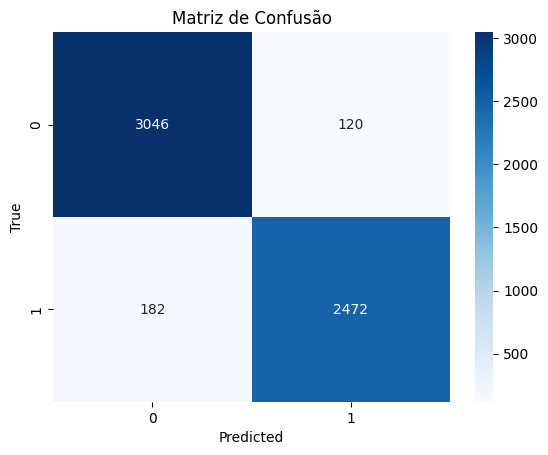

In [42]:

cm = confusion_matrix(y_te, y_SS_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusão')
plt.show()

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score

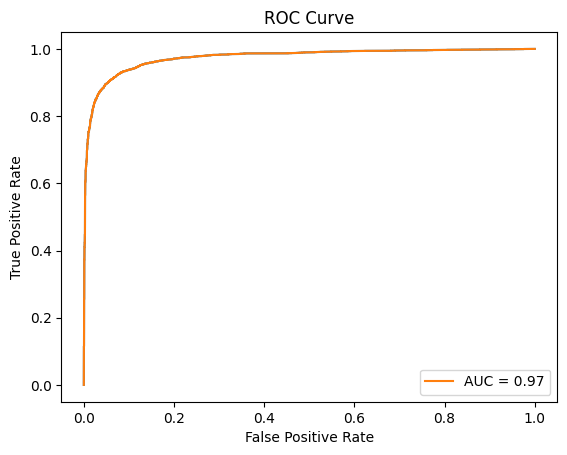

In [153]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_tr, SS_classifier.predict_proba(X_new)[:, 1])

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_tr, SS_classifier.predict_proba(X_new)[:, 1])

plt.plot(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


# Random Forest

In [ ]:
#hyper optimization
parameters = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

RF_classifier = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(RF_classifier, parameters, scoring='f1', cv=5)

grid_search.fit(X_tr[:, 2:], y_tr)

best_params_RF = grid_search.best_params_
best_params_RF

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 1000}

In [118]:
RF_classifier = RandomForestClassifier(random_state=42, max_depth=None, min_samples_split=2, n_estimators=1000)
sum_SS_f1=0
scores_rf = []
mccs_rf = []
f1s_rf = []
recls_ss = []  
precisions_ss = []  
n=0

for train_index, test_index in s.split(X_tr, y_tr):
    positive = 0
    negative = 0
    for i in range(y_tr.shape[0]):
        if y_tr[i] == 1:
            positive += 1
        else:
            negative += 1
    print('Positive samples:', positive)
    print('Negative samples:', negative)

    X_RF_train, X_RF_test, y_RF_train, y_RF_test = X_tr[train_index,2:], X_tr[test_index,2:], y_tr[train_index], y_tr[test_index]

    X_RF_train_new = X_RF_train
    X_RF_train_new = min_max_scaler.fit_transform(X_RF_train_new)

    X_RF_test_new = X_RF_test
    X_RF_test_new = min_max_scaler.transform(X_RF_test_new)

    RF_classifier.fit(X_RF_train_new, y_RF_train)
    scores_rf.append(RF_classifier.score(X_RF_test_new, y_RF_test))
    y_pred = RF_classifier.predict(X_RF_test_new)
    mcc = matthews_corrcoef(y_RF_test, y_pred)
    mccs_rf.append(mcc)
    f1 = f1_score(y_RF_test, y_pred)
    f1s_rf.append(f1)
    recall = recall_score(y_RF_test, y_pred)
    recls_ss.append(recall)  
    precision = precision_score(y_RF_test, y_pred)
    precisions_ss.append(precision)  

print("----------------------------------------")
print("Scores: ", np.min(scores_rf), np.max(scores_rf), np.std(scores_rf))
print("F1s: ", np.min(f1s_rf), np.max(f1s_rf), np.std(f1s_rf))
print("MCCs: ", np.min(mccs_rf), np.max(mccs_rf), np.std(mccs_rf))
print("avg cross-validation accuracy:", (sum(scores_rf) / 10))
print("avg cross-validation f1:", (sum(f1s_rf) / 10))
print("avg cross-validation mcc:", (sum(mccs_rf) / 10))
#recall = recall_score(y_tr, y_tr_predict)
print('Recall on Train set: ', recall)
#precision = precision_score(y_tr, y_tr_predict)
print('Precision on Train set: ', precision)


Positive samples: 3980
Negative samples: 4749
Positive samples: 3980
Negative samples: 4749
Positive samples: 3980
Negative samples: 4749
Positive samples: 3980
Negative samples: 4749
Positive samples: 3980
Negative samples: 4749
Positive samples: 3980
Negative samples: 4749
Positive samples: 3980
Negative samples: 4749
Positive samples: 3980
Negative samples: 4749
Positive samples: 3980
Negative samples: 4749
Positive samples: 3980
Negative samples: 4749
----------------------------------------
Scores:  0.9495412844036697 0.9759450171821306 0.00841243005566204
F1s:  0.9440203562340967 0.9734513274336283 0.00937776108538931
MCCs:  0.8983457897899891 0.9515269447166068 0.016929563037432538
avg cross-validation accuracy: 0.9603607721975262
avg cross-validation f1: 0.9562790678253398
avg cross-validation mcc: 0.920149818125178
Recall on Train set:  0.9321608040201005
Precision on Train set:  0.9561855670103093


Train

In [154]:
X_new = X_tr[:,2:]
X_new = min_max_scaler.fit_transform(X_new)
RF_classifier.fit(X_new, y_tr)
y_tr_predict = RF_classifier.predict(X_new)

print('f1 on Train set: ', f1_score(y_tr, y_tr_predict))
print('MCC on Train set: ', matthews_corrcoef(y_tr, y_tr_predict))

tn, fp, fn, tp = confusion_matrix(y_tr, y_tr_predict).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)
specificity = tn / (tn+fp)
print('Specificity on Train set(tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp+fn)
print('Sensitivity on Train set(tp / (tp+fn)): ', sensitivity)
accuracy = (tp+tn) /(tp+tn+fp+fn)
print('Accuracy on Train set: ', accuracy)
recall = recall_score(y_tr, y_tr_predict)
print('Recall on Train set: ', recall)
precision = precision_score(y_tr, y_tr_predict)
print('Precision on Train set: ', precision)


f1 on Train set:  1.0
MCC on Train set:  1.0
tn, fp, tp, fn 4749 0 3980 0
Specificity on Train set(tn / (tn+fp)):  1.0
Sensitivity on Train set(tp / (tp+fn)):  1.0
Accuracy on Train set:  1.0
Recall on Train set:  1.0
Precision on Train set:  1.0


Test:

In [155]:
X_te_new = X_te[:,2:]
X_te_new = min_max_scaler.transform(X_te_new)
y_RF_pred=RF_classifier.predict(X_te_new)

print("*************************************")
print('f1 on Test set: ', f1_score(y_te, y_RF_pred))
print('MCC on Test set: ', matthews_corrcoef(y_te, y_RF_pred))
tn, fp, fn, tp = confusion_matrix(y_te, y_RF_pred).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)
specificity = tn / (tn+fp)
print('Specificity on Test set(tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp+fn)
print('Sensitivity on Test set(tp / (tp+fn)): ', sensitivity)
accuracy = (tp+tn) /(tp+tn+fp+fn)
print('Accuracy on Test set: ', accuracy)
precision=tp/(tp+fp)
print("Precision on Test set: ", precision)
recall = recall_score(y_te, y_RF_pred)
print('Recall on Test set: ', recall)

*************************************
f1 on Test set:  0.9188976377952756
MCC on Test set:  0.8590368164068913
tn, fp, tp, fn 3074 92 2334 320
Specificity on Test set(tn / (tn+fp)):  0.9709412507896399
Sensitivity on Test set(tp / (tp+fn)):  0.8794272795779955
Accuracy on Test set:  0.9292096219931272
Precision on Test set:  0.9620774938169827
Recall on Test set:  0.8794272795779955


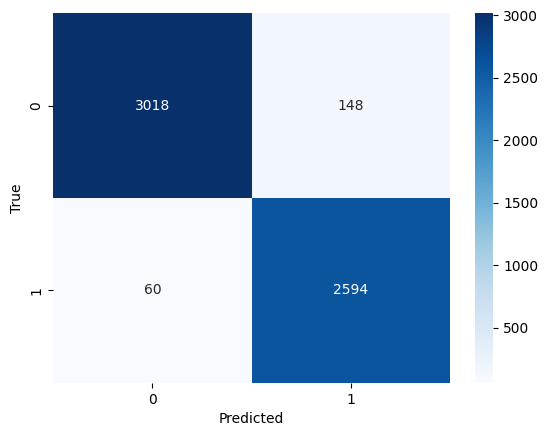

In [47]:
import seaborn as sns

cm = confusion_matrix(y_te, y_RF_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

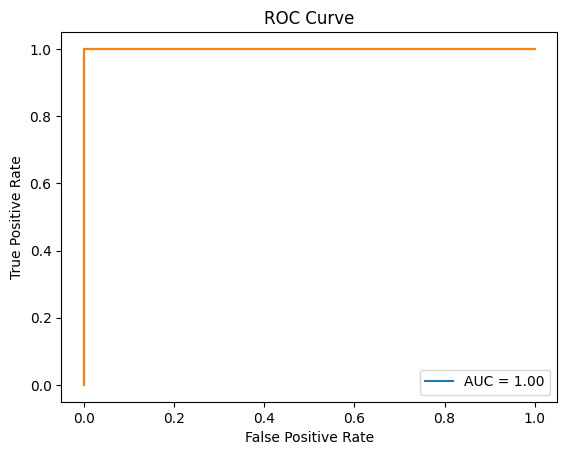

In [156]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_tr, RF_classifier.predict_proba(X_new)[:,1:])

# Compute the AUC score
auc = roc_auc_score(y_tr, RF_classifier.predict_proba(X_new)[:, 1])

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


# Naive Bayes:

In [ ]:
X_tr[:,2:]

array([[12.0, 0.0, 16.667, ..., 0.0, 0.0, 0.0],
       [19.0, 0.0, 31.579, ..., 0.0, 0.0, 0.0],
       [188.0, 9.574, 1.596, ..., 0.0, 0.0, 0.0],
       ...,
       [51.0, 1.961, 0.0, ..., 0.0, 2.0, 0.0],
       [22.0, 9.091, 4.545, ..., 0.0, 0.0, 0.0],
       [74.0, 2.703, 8.108, ..., 0.0, 0.0, 0.0]], dtype=object)

In [122]:
# hyperparaeters:

parameters = {
    'var_smoothing': [1e-12,1e-10,1e-9, 1e-8, 1e-7,1e-5]
}

NB_classifier = GaussianNB()

grid_search = GridSearchCV(NB_classifier, parameters, scoring='f1', cv=5)
grid_search.fit(X_tr[:, 2:], y_tr)

best_params_NB = grid_search.best_params_
best_params_NB

{'var_smoothing': 1e-12}

In [157]:
NB_classifier = GaussianNB(var_smoothing=1e-05)

sum_nb_f1=0
scores_nb = []
mccs_nb = []
f1s_nb = []
recls_ss = []  
precisions_ss = []  
n=0

for train_index, test_index in s.split(X_tr, y_tr):
    positive = 0
    negative = 0
    for i in range(y_tr.shape[0]):
        if y_tr[i] == 1:
            positive += 1
        else:
            negative += 1
    print('Positive samples:', positive)
    print('Negative samples:', negative)

    X_NB_train, X_NB_test, y_NB_train, y_NB_test = X_tr[train_index,2:], X_tr[test_index,2:], y_tr[train_index], y_tr[test_index]

    X_NB_train_new = X_NB_train
    X_NB_train_new = min_max_scaler.fit_transform(X_NB_train_new)

    X_NB_test_new = X_NB_test
    X_NB_test_new = min_max_scaler.transform(X_NB_test_new)

    NB_classifier.fit(X_NB_train_new, y_NB_train)
    scores_nb.append(NB_classifier.score(X_NB_test_new, y_NB_test))
    y_pred = NB_classifier.predict(X_NB_test_new)
    mcc = matthews_corrcoef(y_NB_test, y_pred)
    mccs_nb.append(mcc)
    f1 = f1_score(y_NB_test, y_pred)
    f1s_nb.append(f1)
    recall = recall_score(y_NB_test, y_pred)
    recls_ss.append(recall)  
    precision = precision_score(y_NB_test, y_pred)
    precisions_ss.append(precision)  

print("----------------------------------------")
print("Scores: ", np.min(scores_nb), np.max(scores_nb), np.std(scores_nb))
print("F1s: ", np.min(f1s_nb), np.max(f1s_nb), np.std(f1s_nb))
print("MCCs: ", np.min(mccs_nb), np.max(mccs_nb), np.std(mccs_nb))
print("avg cross-validation accuracy:", (sum(scores_nb) / 10))
print("avg cross-validation f1:", (sum(f1s_nb) / 10))
print("avg cross-validation mcc:", (sum(mccs_nb) / 10))
print("avg cross-validation recall:", np.mean(recls_ss))
print("avg cross-validation precision:", np.mean(precisions_ss))


Positive samples: 3980
Negative samples: 4749
Positive samples: 3980
Negative samples: 4749
Positive samples: 3980
Negative samples: 4749
Positive samples: 3980
Negative samples: 4749
Positive samples: 3980
Negative samples: 4749
Positive samples: 3980
Negative samples: 4749
Positive samples: 3980
Negative samples: 4749
Positive samples: 3980
Negative samples: 4749
Positive samples: 3980
Negative samples: 4749
Positive samples: 3980
Negative samples: 4749
----------------------------------------
Scores:  0.7056128293241696 0.7594501718213058 0.016946806590437295
F1s:  0.7228915662650602 0.765625 0.013994170322192792
MCCs:  0.44249893725458606 0.5387807135328442 0.031148190613185484
avg cross-validation accuracy: 0.7303240959677166
avg cross-validation f1: 0.7412542256853042
avg cross-validation mcc: 0.48498931135799267
avg cross-validation recall: 0.8467336683417086
avg cross-validation precision: 0.6593456965719504


Train:

In [158]:
X_new = X_tr[:,2:]
X_new = min_max_scaler.fit_transform(X_new)
NB_classifier.fit(X_new, y_tr)
y_tr_predict = NB_classifier.predict(X_new)

print('f1 on Train set: ', f1_score(y_tr, y_tr_predict))
print('MCC on Train set: ', matthews_corrcoef(y_tr, y_tr_predict))

tn, fp, fn, tp = confusion_matrix(y_tr, y_tr_predict).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)
specificity = tn / (tn+fp)
print('Specificity on Train set(tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp+fn)
print('Sensitivity on Train set(tp / (tp+fn)): ', sensitivity)
accuracy = (tp+tn) /(tp+tn+fp+fn)
print('Accuracy on Train set: ', accuracy)
recall = recall_score(y_tr, y_tr_predict)
print('Recall on Train set: ', recall)
precision = precision_score(y_tr, y_tr_predict)
print('Precision on Train set: ', precision)

F1 on Train set:  0.7419
MCC on Train set:  0.4865
tn, fp, tp, fn 3008 1741 3374 606
Specificity on Train set (tn / (tn + fp)):  0.6334
Sensitivity on Train set (tp / (tp + fn)):  0.8477
Accuracy on Train set:  0.7311
Recall on Train set:  0.8477
Precision on Train set:  0.6596



Teste:

In [159]:
X_te_new = X_te[:,2:]
X_te_new = min_max_scaler.transform(X_te_new)
y_NB_pred = NB_classifier.predict(X_te_new)

In [160]:
from sklearn.metrics import f1_score, matthews_corrcoef, confusion_matrix, recall_score, precision_score

# Previsão no conjunto de teste usando o classificador Naive Bayes (NB)
y_NB_pred = NB_classifier.predict(X_te_new)  # Assumindo que X_te_new já foi pré-processado

# Cálculo das métricas e arredondamento para 4 casas decimais
f1 = round(f1_score(y_te, y_NB_pred), 4)
mcc = round(matthews_corrcoef(y_te, y_NB_pred), 4)

tn, fp, fn, tp = confusion_matrix(y_te, y_NB_pred).ravel()
specificity = round(tn / (tn + fp), 4)
sensitivity = round(tp / (tp + fn), 4)
accuracy = round((tp + tn) / (tp + tn + fp + fn), 4)
precision = round(tp / (tp + fp), 4)
recall = round(recall_score(y_te, y_NB_pred), 4)

# Impressão dos resultados
print("*************************************")
print('F1 on Test set: ', f1)
print('MCC on Test set: ', mcc)
print("tn, fp, tp, fn", tn, fp, tp, fn)
print('Specificity on Test set (tn / (tn + fp)): ', specificity)
print('Sensitivity on Test set (tp / (tp + fn)): ', sensitivity)
print('Accuracy on Test set: ', accuracy)
print("Precision on Test set: ", precision)
print('Recall on Test set: ', recall)


*************************************
F1 on Test set:  0.7447
MCC on Test set:  0.4926
tn, fp, tp, fn 2022 1144 2253 401
Specificity on Test set (tn / (tn + fp)):  0.6387
Sensitivity on Test set (tp / (tp + fn)):  0.8489
Accuracy on Test set:  0.7345
Precision on Test set:  0.6632
Recall on Test set:  0.8489


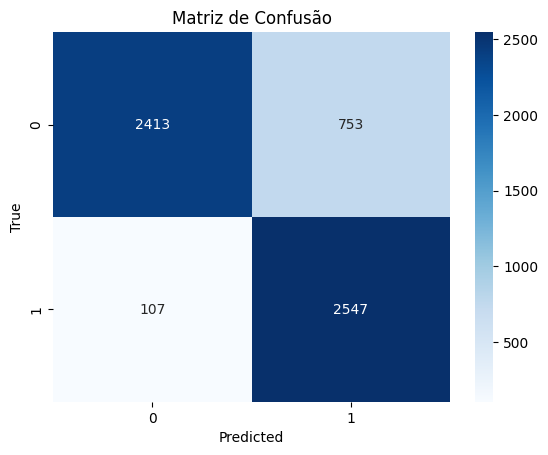

In [53]:
import seaborn as sns
cm = confusion_matrix(y_te, y_NB_pred)
tn, fp, fn, tp = cm.ravel()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusão')
plt.show()

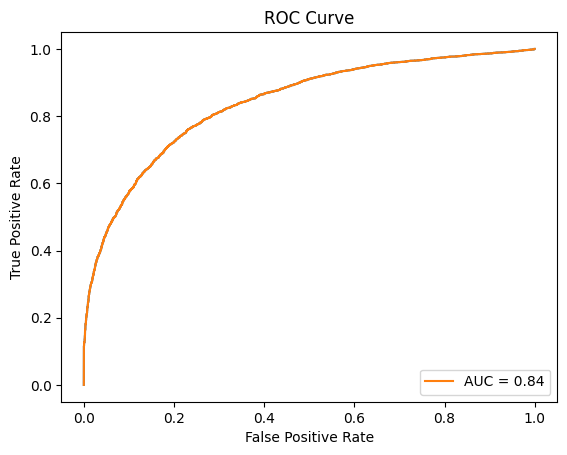

In [161]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_tr, NB_classifier.predict_proba(X_new)[:, 1])


# Calcular a AUC
auc = roc_auc_score(y_tr, NB_classifier.predict_proba(X_new)[:, 1])
plt.plot(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

All curvas:

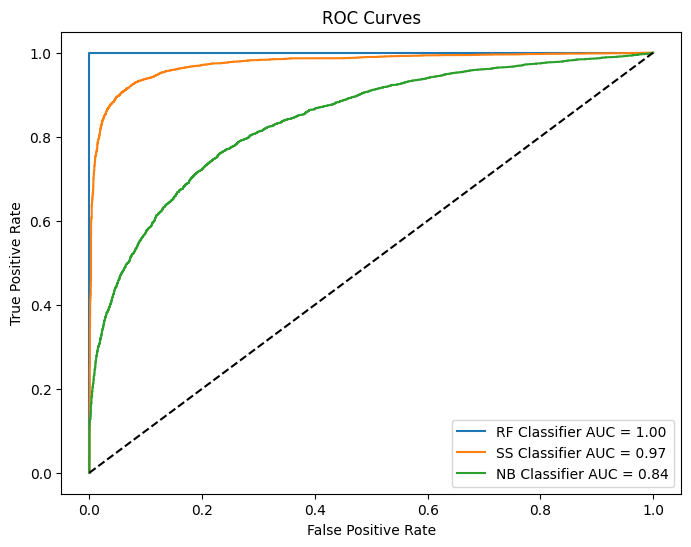

In [162]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ROC Curve for the first classifier (RF_classifier)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_tr, RF_classifier.predict_proba(X_new)[:, 1])
auc_rf = roc_auc_score(y_tr, RF_classifier.predict_proba(X_new)[:, 1])

# ROC Curve for the second classifier (SS_classifier)
fpr_ss, tpr_ss, thresholds_ss = roc_curve(y_tr, SS_classifier.predict_proba(X_new)[:, 1])
auc_ss = roc_auc_score(y_tr, SS_classifier.predict_proba(X_new)[:, 1])

# ROC Curve for the third classifier (NB_classifier)
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_tr, NB_classifier.predict_proba(X_new)[:, 1])
auc_nb = roc_auc_score(y_tr, NB_classifier.predict_proba(X_new)[:, 1])

# Plot the three ROC curves on the same graph
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'RF Classifier AUC = {auc_rf:.2f}')
plt.plot(fpr_ss, tpr_ss, label=f'SS Classifier AUC = {auc_ss:.2f}')
plt.plot(fpr_nb, tpr_nb, label=f'NB Classifier AUC = {auc_nb:.2f}')


plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()


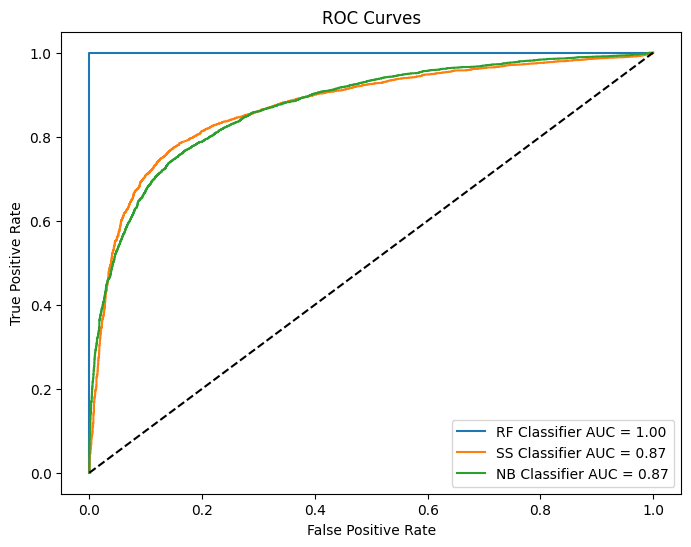

In [129]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_tr, RF_classifier.predict_proba(X_new)[:, 1])
auc_rf = roc_auc_score(y_tr, RF_classifier.predict_proba(X_new)[:, 1])


fpr_ss, tpr_ss, thresholds_ss = roc_curve(y_tr, SS_classifier.predict_proba(X_new)[:, 1])
auc_ss = roc_auc_score(y_tr, SS_classifier.predict_proba(X_new)[:, 1])

fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_tr, NB_classifier.predict_proba(X_new)[:, 1])
auc_nb = roc_auc_score(y_tr, NB_classifier.predict_proba(X_new)[:, 1])


plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'RF Classifier AUC = {auc_rf:.2f}')
plt.plot(fpr_ss, tpr_ss, label=f'SS Classifier AUC = {auc_ss:.2f}')
plt.plot(fpr_nb, tpr_nb, label=f'NB Classifier AUC = {auc_nb:.2f}')

plt.plot([0, 1], [0, 1], 'k--')  # Linha diagonal (curva ROC aleatória)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()


Cross Validation Curves Together:

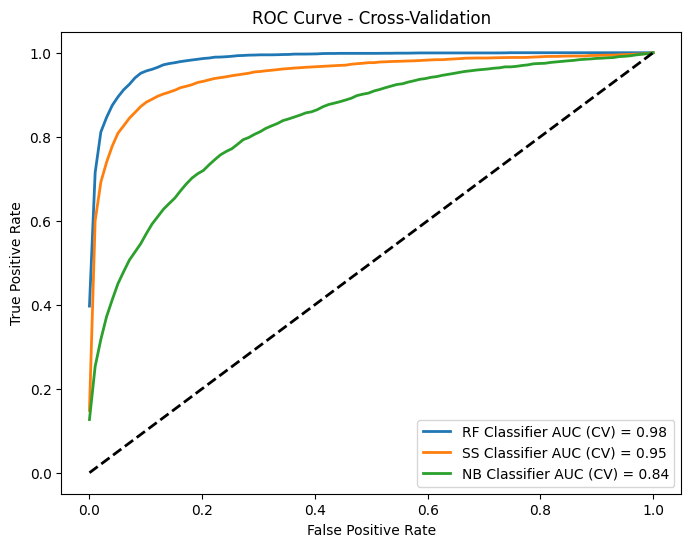

Média das AUCs RF: 0.98 ± 0.00
Média das AUCs SS: 0.95 ± 0.00
Média das AUCs NB: 0.84 ± 0.01


In [163]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Configurar a validação cruzada
cv = StratifiedKFold(n_splits=5)

# Inicializar as variáveis para cada classificador
mean_tpr_rf = 0.0
mean_tpr_ss = 0.0
mean_tpr_nb = 0.0
mean_fpr = np.linspace(0, 1, 100)  # Common reference point for interpolation


roc_aucs_rf = []
roc_aucs_ss = []
roc_aucs_nb = []

# Loop over the folds
for train_idx, test_idx in cv.split(X_new, y_tr):
    # Data Division
    X_train, X_test = X_new[train_idx], X_new[test_idx]
    y_train, y_test = y_tr[train_idx], y_tr[test_idx]
    
    # Random Forest
    RF_classifier.fit(X_train, y_train)
    probas_rf = RF_classifier.predict_proba(X_test)[:, 1]
    fpr_rf, tpr_rf, _ = roc_curve(y_test, probas_rf)
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    roc_aucs_rf.append(roc_auc_rf)
    mean_tpr_rf += np.interp(mean_fpr, fpr_rf, tpr_rf)
    
    #  SS
    SS_classifier.fit(X_train, y_train)
    probas_ss = SS_classifier.predict_proba(X_test)[:, 1]
    fpr_ss, tpr_ss, _ = roc_curve(y_test, probas_ss)
    roc_auc_ss = auc(fpr_ss, tpr_ss)
    roc_aucs_ss.append(roc_auc_ss)
    mean_tpr_ss += np.interp(mean_fpr, fpr_ss, tpr_ss)
    
    #  NB
    NB_classifier.fit(X_train, y_train)
    probas_nb = NB_classifier.predict_proba(X_test)[:, 1]
    fpr_nb, tpr_nb, _ = roc_curve(y_test, probas_nb)
    roc_auc_nb = auc(fpr_nb, tpr_nb)
    roc_aucs_nb.append(roc_auc_nb)
    mean_tpr_nb += np.interp(mean_fpr, fpr_nb, tpr_nb)


mean_tpr_rf /= cv.get_n_splits(X_new, y_tr)
mean_auc_rf = auc(mean_fpr, mean_tpr_rf)

mean_tpr_ss /= cv.get_n_splits(X_new, y_tr)
mean_auc_ss = auc(mean_fpr, mean_tpr_ss)

mean_tpr_nb /= cv.get_n_splits(X_new, y_tr)
mean_auc_nb = auc(mean_fpr, mean_tpr_nb)


plt.figure(figsize=(8, 6))
plt.plot(mean_fpr, mean_tpr_rf, label=f'RF Classifier AUC (CV) = {mean_auc_rf:.2f}', lw=2)
plt.plot(mean_fpr, mean_tpr_ss, label=f'SS Classifier AUC (CV) = {mean_auc_ss:.2f}', lw=2)
plt.plot(mean_fpr, mean_tpr_nb, label=f'NB Classifier AUC (CV) = {mean_auc_nb:.2f}', lw=2)


plt.plot([0, 1], [0, 1], 'k--', lw=2)  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Cross-Validation')
plt.legend(loc='lower right')
plt.show()


print(f'Média das AUCs RF: {np.mean(roc_aucs_rf):.2f} ± {np.std(roc_aucs_rf):.2f}')
print(f'Média das AUCs SS: {np.mean(roc_aucs_ss):.2f} ± {np.std(roc_aucs_ss):.2f}')
print(f'Média das AUCs NB: {np.mean(roc_aucs_nb):.2f} ± {np.std(roc_aucs_nb):.2f}')



# Deep Learning:



In [1]:
! pip install keras-tuner


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, Conv1D,Conv2D, Flatten, MaxPool1D,MaxPool2D, Dropout, Input,GRU
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input

2024-10-06 10:27:36.406668: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-06 10:27:36.424748: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-06 10:27:36.443750: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-06 10:27:36.449435: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-06 10:27:36.463305: I tensorflow/core/platform/cpu_feature_guar

In [4]:
df = pd.read_csv(r"/home/alisboa/FINAL (1).csv")

In [5]:
df

,Unnamed: 0,Sequence,Function
0,3102.0,MSSTQFDHVTVIKKSNVYFGGACISHTVQFEDGTKKTLGVILPTEQ...,non-AMP
1,3103.0,MAIERTLSIVKPDAVSKNHIGEIFARFEKAGLKIVATKMKHLSQAD...,non-AMP
2,3104.0,MQYTLWDIISRVESNGNLKALRFEPEYYQRRMERGDWDNSIIQNIR...,non-AMP
3,3105.0,MKLLHLDSSALGEFSATREIGQAVVQELKKHGPLEVTYRDLHVEPL...,non-AMP
4,3106.0,MNINLTLIGQAIAFAFFVAFCMKFVWPPLINAISERQRKIADGLNA...,non-AMP
...,...,...,...
14544,NaN,VIFKVFWRCKAAFC,antibacterian group ESKAPE
14545,NaN,AVKRAVKRFKVHFRCKAAFC,antibacterian group ESKAPE
14546,NaN,AVNIPFKVHFKVHFRCKAAFC,antibacterian group ESKAPE
14547,NaN,GLLSGVLGAGKKIVAGLSGRA,antibacterian group ESKAPE


In [6]:
df.drop(columns="Unnamed: 0",inplace=True)

In [7]:

df_selected = df[['Sequence', 'Function']]


print("\nDataFrame com Colunas Selecionadas:")
print(df_selected)


DataFrame com Colunas Selecionadas:
                                                Sequence  \
0      MSSTQFDHVTVIKKSNVYFGGACISHTVQFEDGTKKTLGVILPTEQ...   
1      MAIERTLSIVKPDAVSKNHIGEIFARFEKAGLKIVATKMKHLSQAD...   
2      MQYTLWDIISRVESNGNLKALRFEPEYYQRRMERGDWDNSIIQNIR...   
3      MKLLHLDSSALGEFSATREIGQAVVQELKKHGPLEVTYRDLHVEPL...   
4      MNINLTLIGQAIAFAFFVAFCMKFVWPPLINAISERQRKIADGLNA...   
...                                                  ...   
14544                                     VIFKVFWRCKAAFC   
14545                               AVKRAVKRFKVHFRCKAAFC   
14546                              AVNIPFKVHFKVHFRCKAAFC   
14547                              GLLSGVLGAGKKIVAGLSGRA   
14548                              GLLRGVLGAGKKIVCGLSGRC   

                         Function  
0                         non-AMP  
1                         non-AMP  
2                         non-AMP  
3                         non-AMP  
4                         non-AMP  
...                       

In [8]:
df_selected

,Sequence,Function
0,MSSTQFDHVTVIKKSNVYFGGACISHTVQFEDGTKKTLGVILPTEQ...,non-AMP
1,MAIERTLSIVKPDAVSKNHIGEIFARFEKAGLKIVATKMKHLSQAD...,non-AMP
2,MQYTLWDIISRVESNGNLKALRFEPEYYQRRMERGDWDNSIIQNIR...,non-AMP
3,MKLLHLDSSALGEFSATREIGQAVVQELKKHGPLEVTYRDLHVEPL...,non-AMP
4,MNINLTLIGQAIAFAFFVAFCMKFVWPPLINAISERQRKIADGLNA...,non-AMP
...,...,...
14544,VIFKVFWRCKAAFC,antibacterian group ESKAPE
14545,AVKRAVKRFKVHFRCKAAFC,antibacterian group ESKAPE
14546,AVNIPFKVHFKVHFRCKAAFC,antibacterian group ESKAPE
14547,GLLSGVLGAGKKIVAGLSGRA,antibacterian group ESKAPE


label encoder

In [11]:

label_encoder = LabelEncoder()
df['Function'] = label_encoder.fit_transform(df['Function'])

In [12]:
df

,Sequence,Function
0,MSSTQFDHVTVIKKSNVYFGGACISHTVQFEDGTKKTLGVILPTEQ...,1
1,MAIERTLSIVKPDAVSKNHIGEIFARFEKAGLKIVATKMKHLSQAD...,1
2,MQYTLWDIISRVESNGNLKALRFEPEYYQRRMERGDWDNSIIQNIR...,1
3,MKLLHLDSSALGEFSATREIGQAVVQELKKHGPLEVTYRDLHVEPL...,1
4,MNINLTLIGQAIAFAFFVAFCMKFVWPPLINAISERQRKIADGLNA...,1
...,...,...
14544,VIFKVFWRCKAAFC,0
14545,AVKRAVKRFKVHFRCKAAFC,0
14546,AVNIPFKVHFKVHFRCKAAFC,0
14547,GLLSGVLGAGKKIVAGLSGRA,0


Encoding:

In [13]:
enconde_df = Encoding(dataset= df ,  col= 'Sequence')
enconde_df.result

,Sequence,Function
0,MSSTQFDHVTVIKKSNVYFGGACISHTVQFEDGTKKTLGVILPTEQ...,1
1,MAIERTLSIVKPDAVSKNHIGEIFARFEKAGLKIVATKMKHLSQAD...,1
2,MQYTLWDIISRVESNGNLKALRFEPEYYQRRMERGDWDNSIIQNIR...,1
3,MKLLHLDSSALGEFSATREIGQAVVQELKKHGPLEVTYRDLHVEPL...,1
4,MNINLTLIGQAIAFAFFVAFCMKFVWPPLINAISERQRKIADGLNA...,1
...,...,...
14544,VIFKVFWRCKAAFC,0
14545,AVKRAVKRFKVHFRCKAAFC,0
14546,AVNIPFKVHFKVHFRCKAAFC,0
14547,GLLSGVLGAGKKIVAGLSGRA,0


Blosum

In [20]:
blosum = enconde_df.get_blosum()
print(np.array(blosum['blosum'][0]).shape)
print(blosum['blosum'])

(108, 23)
0        [[-1, -1, -2, -3, -1, 0, -2, -3, -2, 1, 2, -1,...
1        [[-1, -1, -2, -3, -1, 0, -2, -3, -2, 1, 2, -1,...
2        [[-1, -1, -2, -3, -1, 0, -2, -3, -2, 1, 2, -1,...
3        [[-1, -1, -2, -3, -1, 0, -2, -3, -2, 1, 2, -1,...
4        [[-1, -1, -2, -3, -1, 0, -2, -3, -2, 1, 2, -1,...
                               ...                        
14544    [[0, -3, -3, -3, -1, -2, -2, -3, -3, 3, 1, -2,...
14545    [[4, -1, -2, -2, 0, -1, -1, 0, -2, -1, -1, -1,...
14546    [[4, -1, -2, -2, 0, -1, -1, 0, -2, -1, -1, -1,...
14547    [[0, -2, 0, -1, -3, -2, -2, 6, -2, -4, -4, -2,...
14548    [[0, -2, 0, -1, -3, -2, -2, 6, -2, -4, -4, -2,...
Name: blosum, Length: 14549, dtype: object


In [21]:
blosum

,Sequence,Function,pad_seques,One_hot_encoding,blosum
0,MSSTQFDHVTVIKKSNVYFGGACISHTVQFEDGTKKTLGVILPTEQ...,1,MSSTQFDHVTVIKKSNVYFGGACISHTVQFEDGTKKTLGVILPTEQ...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[-1, -1, -2, -3, -1, 0, -2, -3, -2, 1, 2, -1,..."
1,MAIERTLSIVKPDAVSKNHIGEIFARFEKAGLKIVATKMKHLSQAD...,1,MAIERTLSIVKPDAVSKNHIGEIFARFEKAGLKIVATKMKHLSQAD...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[-1, -1, -2, -3, -1, 0, -2, -3, -2, 1, 2, -1,..."
2,MQYTLWDIISRVESNGNLKALRFEPEYYQRRMERGDWDNSIIQNIR...,1,MQYTLWDIISRVESNGNLKALRFEPEYYQRRMERGDWDNSIIQNIR...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[-1, -1, -2, -3, -1, 0, -2, -3, -2, 1, 2, -1,..."
3,MKLLHLDSSALGEFSATREIGQAVVQELKKHGPLEVTYRDLHVEPL...,1,MKLLHLDSSALGEFSATREIGQAVVQELKKHGPLEVTYRDLHVEPL...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[-1, -1, -2, -3, -1, 0, -2, -3, -2, 1, 2, -1,..."
4,MNINLTLIGQAIAFAFFVAFCMKFVWPPLINAISERQRKIADGLNA...,1,MNINLTLIGQAIAFAFFVAFCMKFVWPPLINAISERQRKIADGLNA...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[-1, -1, -2, -3, -1, 0, -2, -3, -2, 1, 2, -1,..."
...,...,...,...,...,...
14544,VIFKVFWRCKAAFC,0,VIFKVFWRCKAAFCXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, -3, -3, -3, -1, -2, -2, -3, -3, 3, 1, -2,..."
14545,AVKRAVKRFKVHFRCKAAFC,0,AVKRAVKRFKVHFRCKAAFCXXXXXXXXXXXXXXXXXXXXXXXXXX...,"[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[4, -1, -2, -2, 0, -1, -1, 0, -2, -1, -1, -1,..."
14546,AVNIPFKVHFKVHFRCKAAFC,0,AVNIPFKVHFKVHFRCKAAFCXXXXXXXXXXXXXXXXXXXXXXXXX...,"[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[4, -1, -2, -2, 0, -1, -1, 0, -2, -1, -1, -1,..."
14547,GLLSGVLGAGKKIVAGLSGRA,0,GLLSGVLGAGKKIVAGLSGRAXXXXXXXXXXXXXXXXXXXXXXXXX...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...","[[0, -2, 0, -1, -3, -2, -2, 6, -2, -4, -4, -2,..."


In [22]:
data = blosum.loc[:, ['Function','pad_seques','blosum']]

print(data)

       Function                                         pad_seques  \
0             1  MSSTQFDHVTVIKKSNVYFGGACISHTVQFEDGTKKTLGVILPTEQ...   
1             1  MAIERTLSIVKPDAVSKNHIGEIFARFEKAGLKIVATKMKHLSQAD...   
2             1  MQYTLWDIISRVESNGNLKALRFEPEYYQRRMERGDWDNSIIQNIR...   
3             1  MKLLHLDSSALGEFSATREIGQAVVQELKKHGPLEVTYRDLHVEPL...   
4             1  MNINLTLIGQAIAFAFFVAFCMKFVWPPLINAISERQRKIADGLNA...   
...         ...                                                ...   
14544         0  VIFKVFWRCKAAFCXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...   
14545         0  AVKRAVKRFKVHFRCKAAFCXXXXXXXXXXXXXXXXXXXXXXXXXX...   
14546         0  AVNIPFKVHFKVHFRCKAAFCXXXXXXXXXXXXXXXXXXXXXXXXX...   
14547         0  GLLSGVLGAGKKIVAGLSGRAXXXXXXXXXXXXXXXXXXXXXXXXX...   
14548         0  GLLRGVLGAGKKIVCGLSGRCXXXXXXXXXXXXXXXXXXXXXXXXX...   

                                                  blosum  
0      [[-1, -1, -2, -3, -1, 0, -2, -3, -2, 1, 2, -1,...  
1      [[-1, -1, -2, -3, -1, 0, -2, -3, -

In [23]:

enconde_df = Encoding(dataset= data ,  col= 'pad_seques')

blosum = enconde_df.get_blosum()

expanded_arrays =  blosum['blosum'].apply(lambda x: np.array(x))
X = np.array(expanded_arrays.tolist())

y = blosum['Function']

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('train_x', X_train.shape)
print('test_x', x_test.shape)

train_x (11639, 456, 23)
test_x (2910, 456, 23)


In [25]:
X

array([[[-1, -1, -2, ..., -3, -1, -1],
        [ 1, -1,  1, ...,  0,  0,  0],
        [ 1, -1,  1, ...,  0,  0,  0],
        ...,
        [ 0, -1, -1, ..., -1, -1, -1],
        [ 0, -1, -1, ..., -1, -1, -1],
        [ 0, -1, -1, ..., -1, -1, -1]],

       [[-1, -1, -2, ..., -3, -1, -1],
        [ 4, -1, -2, ..., -2, -1,  0],
        [-1, -3, -3, ..., -3, -3, -1],
        ...,
        [ 0, -1, -1, ..., -1, -1, -1],
        [ 0, -1, -1, ..., -1, -1, -1],
        [ 0, -1, -1, ..., -1, -1, -1]],

       [[-1, -1, -2, ..., -3, -1, -1],
        [-1,  1,  0, ...,  0,  3, -1],
        [-2, -2, -2, ..., -3, -2, -1],
        ...,
        [ 0, -1, -1, ..., -1, -1, -1],
        [ 0, -1, -1, ..., -1, -1, -1],
        [ 0, -1, -1, ..., -1, -1, -1]],

       ...,

       [[ 4, -1, -2, ..., -2, -1,  0],
        [ 0, -3, -3, ..., -3, -2, -1],
        [-2,  0,  6, ...,  3,  0, -1],
        ...,
        [ 0, -1, -1, ..., -1, -1, -1],
        [ 0, -1, -1, ..., -1, -1, -1],
        [ 0, -1, -1, ..., -1, -1

In [26]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14544    0
14545    0
14546    0
14547    0
14548    0
Name: Function, Length: 14549, dtype: int64

zscale

In [27]:
zscale = enconde_df.get_zscale()
print(np.array(zscale['zscale'][0]).shape)
print(zscale['zscale'])

(456, 5)
0        [[-2.85, -0.22, 0.47, 1.94, -0.98], [2.39, -1....
1        [[-2.85, -0.22, 0.47, 1.94, -0.98], [0.24, -2....
2        [[-2.85, -0.22, 0.47, 1.94, -0.98], [1.75, 0.5...
3        [[-2.85, -0.22, 0.47, 1.94, -0.98], [2.29, 0.8...
4        [[-2.85, -0.22, 0.47, 1.94, -0.98], [3.05, 1.6...
                               ...                        
14544    [[-2.59, -2.64, -1.54, -0.85, -0.02], [-3.89, ...
14545    [[0.24, -2.32, 0.6, -0.14, 1.3], [-2.59, -2.64...
14546    [[0.24, -2.32, 0.6, -0.14, 1.3], [-2.59, -2.64...
14547    [[2.05, -4.06, 0.36, -0.82, -0.38], [-4.28, -1...
14548    [[2.05, -4.06, 0.36, -0.82, -0.38], [-4.28, -1...
Name: zscale, Length: 14549, dtype: object


In [28]:
data = zscale.loc[:, ['Function','zscale']]

print(data)

       Function                                             zscale
0             1  [[-2.85, -0.22, 0.47, 1.94, -0.98], [2.39, -1....
1             1  [[-2.85, -0.22, 0.47, 1.94, -0.98], [0.24, -2....
2             1  [[-2.85, -0.22, 0.47, 1.94, -0.98], [1.75, 0.5...
3             1  [[-2.85, -0.22, 0.47, 1.94, -0.98], [2.29, 0.8...
4             1  [[-2.85, -0.22, 0.47, 1.94, -0.98], [3.05, 1.6...
...         ...                                                ...
14544         0  [[-2.59, -2.64, -1.54, -0.85, -0.02], [-3.89, ...
14545         0  [[0.24, -2.32, 0.6, -0.14, 1.3], [-2.59, -2.64...
14546         0  [[0.24, -2.32, 0.6, -0.14, 1.3], [-2.59, -2.64...
14547         0  [[2.05, -4.06, 0.36, -0.82, -0.38], [-4.28, -1...
14548         0  [[2.05, -4.06, 0.36, -0.82, -0.38], [-4.28, -1...

[14549 rows x 2 columns]


In [29]:
#open 
max_length = 456
padding_value = 'X'
df['padded_sequence'] = [seq + padding_value * (max_length - len(seq)) for seq in df['Sequence']]

#open 
enconde_df = Encoding(dataset= df ,  col= 'padded_sequence')

zscale = enconde_df.get_zscale()

expanded_arrays =  zscale['zscale'].apply(lambda x: np.array(x))
X = np.array(expanded_arrays.tolist())

y = zscale['Function']

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('train_x', X_train.shape)
print('test_x', x_test.shape)

train_x (11639, 456, 5)
test_x (2910, 456, 5)


In [30]:
X

array([[[-2.85, -0.22,  0.47,  1.94, -0.98],
        [ 2.39, -1.07,  1.15, -1.39,  0.67],
        [ 2.39, -1.07,  1.15, -1.39,  0.67],
        ...,
        [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ]],

       [[-2.85, -0.22,  0.47,  1.94, -0.98],
        [ 0.24, -2.32,  0.6 , -0.14,  1.3 ],
        [-3.89, -1.73, -1.71, -0.84,  0.26],
        ...,
        [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ]],

       [[-2.85, -0.22,  0.47,  1.94, -0.98],
        [ 1.75,  0.5 , -1.44, -1.34,  0.66],
        [-2.54,  2.44,  0.43,  0.04, -1.47],
        ...,
        [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ]],

       ...,

       [[ 0.24, -2.32,  0.6 , -0.14,  1.3 ],
        [-2.59, -2.64, -1.54, -0.85, -0.02],
        [ 3.05,  1.62,  1.04, -1.15,  1.61

In [31]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14544    0
14545    0
14546    0
14547    0
14548    0
Name: Function, Length: 14549, dtype: int64

One_hot_encoding

In [76]:
hot_encoded = enconde_df.get_hot_encoded()
#print(hot_encoded['One_hot_encoding'][0].shape)
print(hot_encoded['One_hot_encoding'])

0        [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
1        [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
2        [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
3        [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
4        [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
                               ...                        
14544    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
14545    [[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
14546    [[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
14547    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...
14548    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...
Name: One_hot_encoding, Length: 14549, dtype: object


In [38]:
maior_tamanho = df['Sequence'].apply(len).max()
maior_tamanho

456

In [39]:
tamanho_medio = df['Sequence'].apply(len).mean()
tamanho_medio

68.80452264760464

One_hot_encoding and pad_seques:

In [16]:
enconde_df = Encoding(dataset= df ,  col= 'Sequence')

res = enconde_df.get_pad_and_hot_encoding(seq_len=456)
res

,Sequence,Function,pad_seques,One_hot_encoding
0,MSSTQFDHVTVIKKSNVYFGGACISHTVQFEDGTKKTLGVILPTEQ...,1,MSSTQFDHVTVIKKSNVYFGGACISHTVQFEDGTKKTLGVILPTEQ...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,MAIERTLSIVKPDAVSKNHIGEIFARFEKAGLKIVATKMKHLSQAD...,1,MAIERTLSIVKPDAVSKNHIGEIFARFEKAGLKIVATKMKHLSQAD...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,MQYTLWDIISRVESNGNLKALRFEPEYYQRRMERGDWDNSIIQNIR...,1,MQYTLWDIISRVESNGNLKALRFEPEYYQRRMERGDWDNSIIQNIR...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,MKLLHLDSSALGEFSATREIGQAVVQELKKHGPLEVTYRDLHVEPL...,1,MKLLHLDSSALGEFSATREIGQAVVQELKKHGPLEVTYRDLHVEPL...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,MNINLTLIGQAIAFAFFVAFCMKFVWPPLINAISERQRKIADGLNA...,1,MNINLTLIGQAIAFAFFVAFCMKFVWPPLINAISERQRKIADGLNA...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
...,...,...,...,...
14544,VIFKVFWRCKAAFC,0,VIFKVFWRCKAAFCXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
14545,AVKRAVKRFKVHFRCKAAFC,0,AVKRAVKRFKVHFRCKAAFCXXXXXXXXXXXXXXXXXXXXXXXXXX...,"[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
14546,AVNIPFKVHFKVHFRCKAAFC,0,AVNIPFKVHFKVHFRCKAAFCXXXXXXXXXXXXXXXXXXXXXXXXX...,"[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
14547,GLLSGVLGAGKKIVAGLSGRA,0,GLLSGVLGAGKKIVAGLSGRAXXXXXXXXXXXXXXXXXXXXXXXXX...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,..."


In [78]:
data = res.loc[:, ['Function','pad_seques','One_hot_encoding']]

print(data)

       Function                                         pad_seques  \
0             1  MSSTQFDHVTVIKKSNVYFGGACISHTVQFEDGTKKTLGVILPTEQ...   
1             1  MAIERTLSIVKPDAVSKNHIGEIFARFEKAGLKIVATKMKHLSQAD...   
2             1  MQYTLWDIISRVESNGNLKALRFEPEYYQRRMERGDWDNSIIQNIR...   
3             1  MKLLHLDSSALGEFSATREIGQAVVQELKKHGPLEVTYRDLHVEPL...   
4             1  MNINLTLIGQAIAFAFFVAFCMKFVWPPLINAISERQRKIADGLNA...   
...         ...                                                ...   
14544         0  VIFKVFWRCKAAFCXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...   
14545         0  AVKRAVKRFKVHFRCKAAFCXXXXXXXXXXXXXXXXXXXXXXXXXX...   
14546         0  AVNIPFKVHFKVHFRCKAAFCXXXXXXXXXXXXXXXXXXXXXXXXX...   
14547         0  GLLSGVLGAGKKIVAGLSGRAXXXXXXXXXXXXXXXXXXXXXXXXX...   
14548         0  GLLRGVLGAGKKIVCGLSGRCXXXXXXXXXXXXXXXXXXXXXXXXX...   

                                        One_hot_encoding  
0      [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
1      [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [19]:
enconde_df = Encoding(dataset= df ,  col= 'Sequence')

res = enconde_df.get_pad_and_hot_encoding(seq_len=456)
res

,Sequence,Function,pad_seques,One_hot_encoding
0,MSSTQFDHVTVIKKSNVYFGGACISHTVQFEDGTKKTLGVILPTEQ...,1,MSSTQFDHVTVIKKSNVYFGGACISHTVQFEDGTKKTLGVILPTEQ...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,MAIERTLSIVKPDAVSKNHIGEIFARFEKAGLKIVATKMKHLSQAD...,1,MAIERTLSIVKPDAVSKNHIGEIFARFEKAGLKIVATKMKHLSQAD...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,MQYTLWDIISRVESNGNLKALRFEPEYYQRRMERGDWDNSIIQNIR...,1,MQYTLWDIISRVESNGNLKALRFEPEYYQRRMERGDWDNSIIQNIR...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,MKLLHLDSSALGEFSATREIGQAVVQELKKHGPLEVTYRDLHVEPL...,1,MKLLHLDSSALGEFSATREIGQAVVQELKKHGPLEVTYRDLHVEPL...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,MNINLTLIGQAIAFAFFVAFCMKFVWPPLINAISERQRKIADGLNA...,1,MNINLTLIGQAIAFAFFVAFCMKFVWPPLINAISERQRKIADGLNA...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
...,...,...,...,...
14544,VIFKVFWRCKAAFC,0,VIFKVFWRCKAAFCXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
14545,AVKRAVKRFKVHFRCKAAFC,0,AVKRAVKRFKVHFRCKAAFCXXXXXXXXXXXXXXXXXXXXXXXXXX...,"[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
14546,AVNIPFKVHFKVHFRCKAAFC,0,AVNIPFKVHFKVHFRCKAAFCXXXXXXXXXXXXXXXXXXXXXXXXX...,"[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
14547,GLLSGVLGAGKKIVAGLSGRA,0,GLLSGVLGAGKKIVAGLSGRAXXXXXXXXXXXXXXXXXXXXXXXXX...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,..."


Test and training division

In [80]:
from sklearn.model_selection import train_test_split

expanded_arrays = data['One_hot_encoding'].apply(lambda x: np.array(x))
X = np.array(expanded_arrays.tolist())


# X = np.array(res['One_hot_encoding'].apply(lambda x: np.array(x[0])))
y = data['Function']

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('train_x', X_train.shape)
print('test_x', x_test.shape)

train_x (11639, 456, 21)
test_x (2910, 456, 21)


# CNN

In [28]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Conv1D,Conv2D, Flatten, MaxPool1D,MaxPool2D, Dropout, Input,GRU
from tensorflow.keras.layers import Embedding, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define the callbacks

checkpoint = ModelCheckpoint(filepath='best_model.keras', save_best_only=True, monitor='val_accuracy', mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

Define Customized Metrics:

In [29]:
pip show tensorflow


Name: tensorflow
Version: 2.17.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /home/alisboa/miniforge3/envs/tese/lib/python3.11/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [30]:
import tensorflow as tf

def recall_m(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)))
    possible_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true, 0, 1)))
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
    return recall

def precision_m(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)))
    predicted_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))


Model construction:

In [31]:
from tensorflow.python.keras import regularizers


In [32]:
from tensorflow.keras import regularizers


In [37]:
model = Sequential([
    #Input(shape=(456, 21)),
    #Input(shape=(456, 23)),
    Input(shape=(456, 5)),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPool1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPool1D(pool_size=2),
    Flatten(),
    
    # Camada Dense com regularização L2
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    
    # Outra camada Dense com regularização L2
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    
    # Camada de saída
    Dense(1, activation='sigmoid')
])



In [77]:
# model = Sequential([
#     Input(shape=(456, 21)),
#     Conv1D(filters=64, kernel_size=3, activation='relu'),
#     MaxPool1D(pool_size=2),
#     Conv1D(filters=128, kernel_size=3, activation='relu'),
#     MaxPool1D(pool_size=2),
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dropout(0.5),
#     Dense(64, activation='relu'),
#     Dropout(0.5),
#     Dense(1, activation='sigmoid')
# ]) #aumentei dropout antes estava 0.2 #este era o anterior

Compile the model

In [34]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) #example

Compile the model with the customized metrics:

In [39]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', f1_m, precision_m, recall_m])

Training the model

In [40]:
history = model.fit(X_train, y_train, batch_size=64, epochs=100, validation_split=0.2,callbacks=[checkpoint, early_stopping])

Epoch 1/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9106 - f1_m: 0.8988 - loss: 0.4411 - precision_m: 0.8963 - recall_m: 0.9062 - val_accuracy: 0.9621 - val_f1_m: 0.9594 - val_loss: 0.2017 - val_precision_m: 0.9555 - val_recall_m: 0.9637
Epoch 2/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9580 - f1_m: 0.9522 - loss: 0.2017 - precision_m: 0.9397 - recall_m: 0.9669 - val_accuracy: 0.9641 - val_f1_m: 0.9622 - val_loss: 0.1643 - val_precision_m: 0.9538 - val_recall_m: 0.9718
Epoch 3/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9656 - f1_m: 0.9608 - loss: 0.1714 - precision_m: 0.9461 - recall_m: 0.9774 - val_accuracy: 0.9651 - val_f1_m: 0.9625 - val_loss: 0.1616 - val_precision_m: 0.9612 - val_recall_m: 0.9648
Epoch 4/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9724 - f1_m: 0.9690 - loss: 0.1412 - precision_m: 0.9586 - recall_m: 0.9810 - val_accuracy: 0.9692 - val_f1_m: 0.9664 - val_loss: 0.1473 - val_precision_m: 0.9667 - val_r

Evaluate the model on the test data

In [41]:
#loss, accuracy = model.evaluate(x_test, y_test)
loss, accuracy, f1_score, precision, recall = model.evaluate(x_test, y_test)

151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9864 - f1_m: 0.9845 - loss: 0.0859 - precision_m: 0.9796 - recall_m: 0.9905


In [42]:
loss, accuracy, f1_score, precision, recall = model.evaluate(x_test, y_test)

# Impressão dos resultados
print('--------------------------------')
print("Mean Training Accuracy:", np.mean(history.history['accuracy']))
print("Mean Validation Accuracy:", np.mean(history.history['val_accuracy']))
print("Mean Training Loss:", np.mean(history.history['loss']))
print("Mean Validation Loss:", np.mean(history.history['val_loss']))
print("Mean Training F1 Score:", np.mean(history.history['f1_m']))
print("Mean Validation F1 Score:", np.mean(history.history['val_f1_m']))
print("Mean Training Precision:", np.mean(history.history['precision_m']))
print("Mean Validation Precision:", np.mean(history.history['val_precision_m']))
print("Mean Training Recall:", np.mean(history.history['recall_m']))
print("Mean Validation Recall:", np.mean(history.history['val_recall_m']))
print('--------------------------------')

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test F1 Score: {f1_score:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")

151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9864 - f1_m: 0.9845 - loss: 0.0859 - precision_m: 0.9796 - recall_m: 0.9905
--------------------------------
Mean Training Accuracy: 0.9944587479799222
Mean Validation Accuracy: 0.9748849417918768
Mean Training Loss: 0.05923028815633211
Mean Validation Loss: 0.1455188785225917
Mean Training F1 Score: 0.9937918216754229
Mean Validation F1 Score: 0.9732357813761785
Mean Training Precision: 0.9923286583179083
Mean Validation Precision: 0.969042494510993
Mean Training Recall: 0.9955440912491236
Mean Validation Recall: 0.9784574753198868
--------------------------------
Test Loss: 0.0966
Test Accuracy: 0.9852
Test F1 Score: 0.9832
Test Precision: 0.9802
Test Recall: 0.9876


In [43]:
print('===================================')
print("Mean Training Accuracy:", np.mean(history.history['accuracy']))
print("Mean Validation Accuracy:", np.mean(history.history['val_accuracy']))
print("Mean Training Loss:", np.mean(history.history['loss']))
print("Mean Validation Loss:", np.mean(history.history['val_loss']))

print('===================================')

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}") #este é como está no exemplo


Mean Training Accuracy: 0.9944587479799222
Mean Validation Accuracy: 0.9748849417918768
Mean Training Loss: 0.05923028815633211
Mean Validation Loss: 0.1455188785225917
Test Loss: 0.0966
Test Accuracy: 0.9852


In [44]:
# converts these probabilities into binary predictions (0 or 1) using a threshold of 0.5.

y_pred = model.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype("int32")  

print(y_pred_classes[:10])  

151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[[0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]]


 MCC

In [45]:
from sklearn.metrics import matthews_corrcoef

# Obter previsões do modelo
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calcular MCC
mcc = matthews_corrcoef(y_test, y_pred)

print(f"Test MCC: {mcc:.4f}")

151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Test MCC: 0.9703


Graphics:

Learning Curves

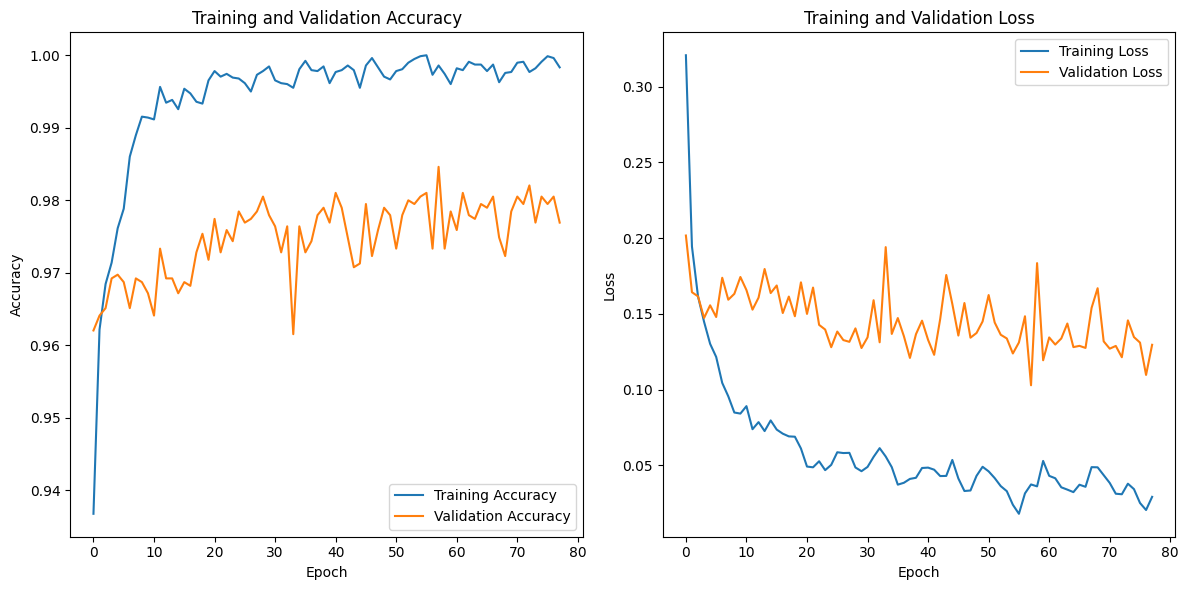

In [46]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show() #BLOSUM Z-scale

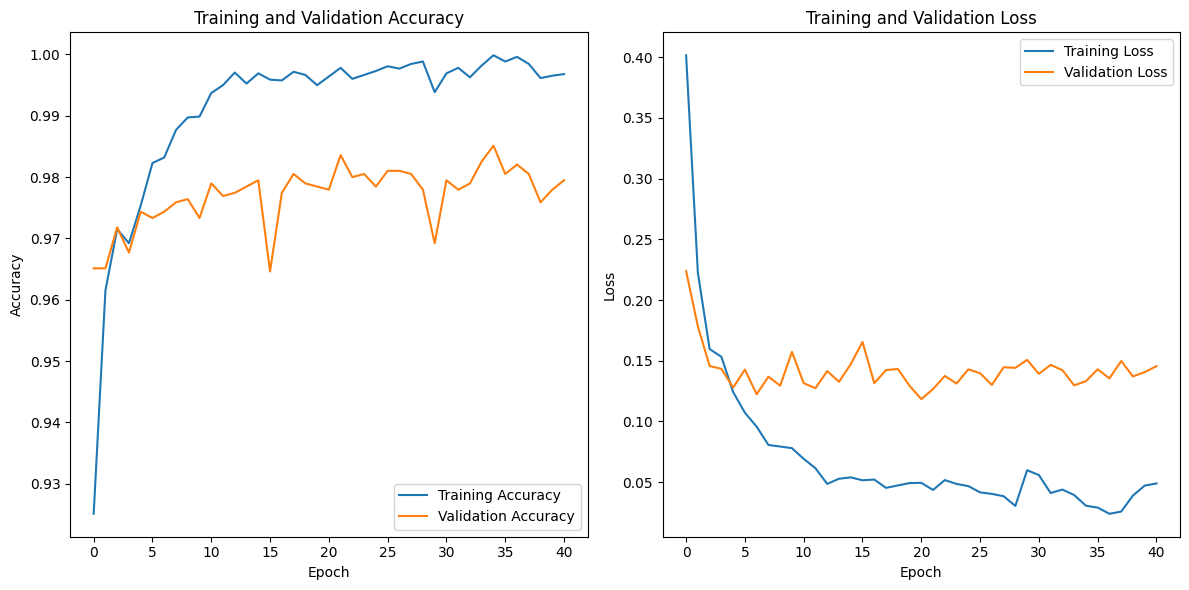

In [95]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show() #BLOSUM

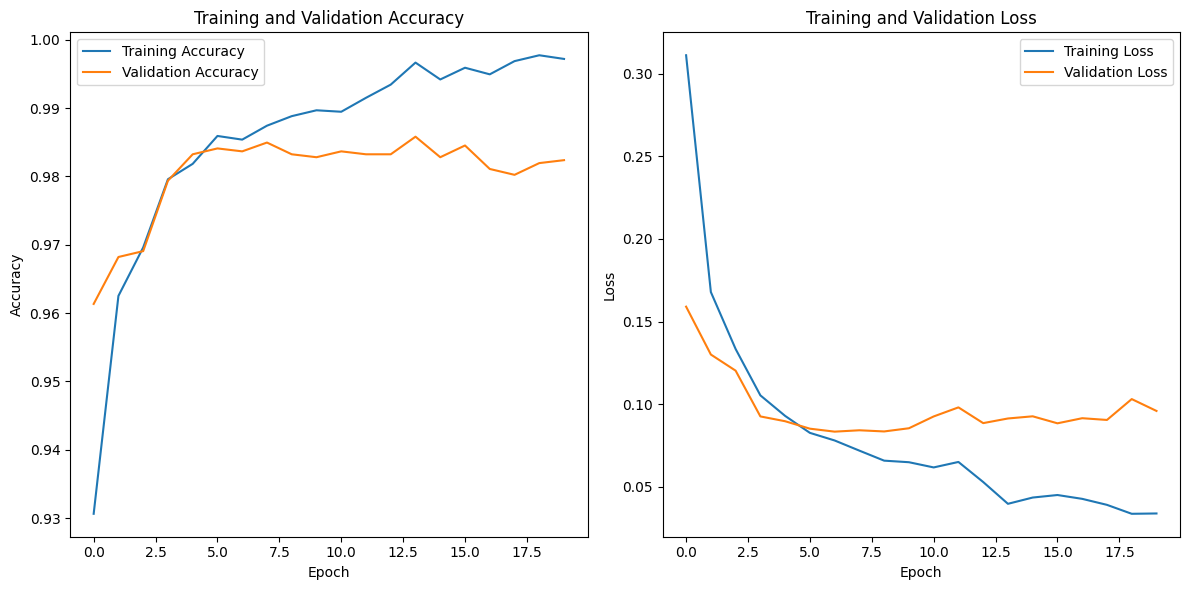

In [67]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

Confusion Matrix


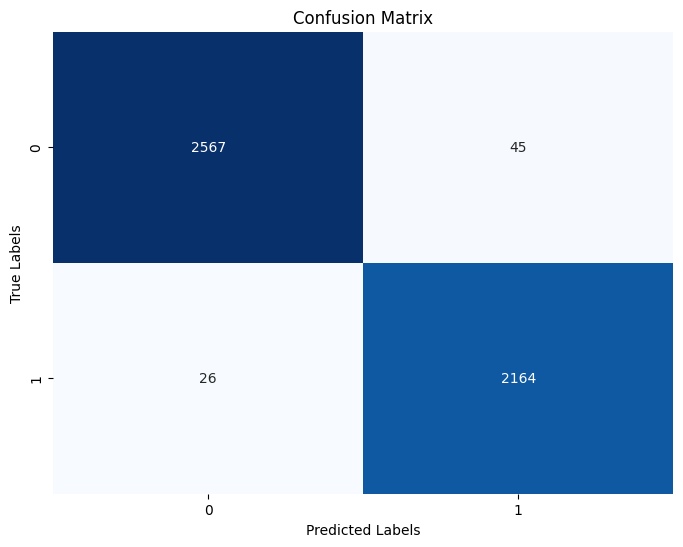

In [47]:

cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show() #Z score

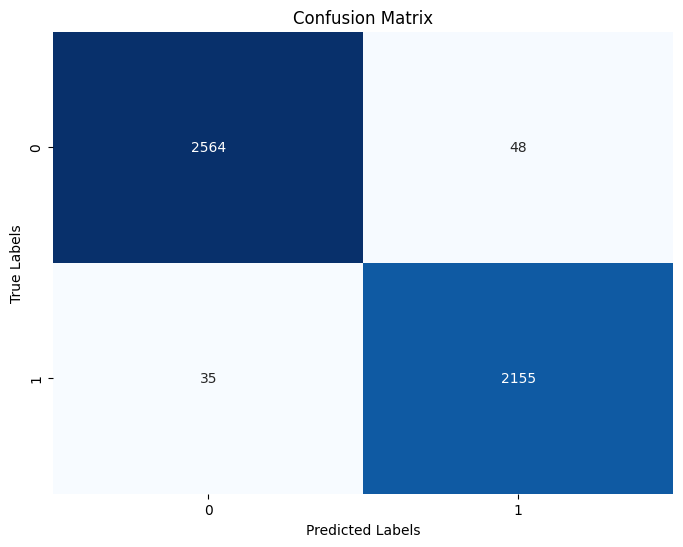

In [96]:

cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show() #Blosuum

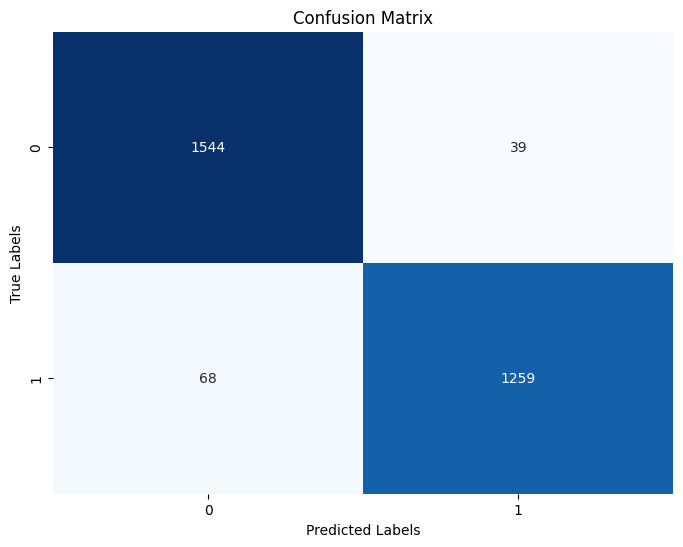

In [46]:

cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

 ROC-AUC Curve

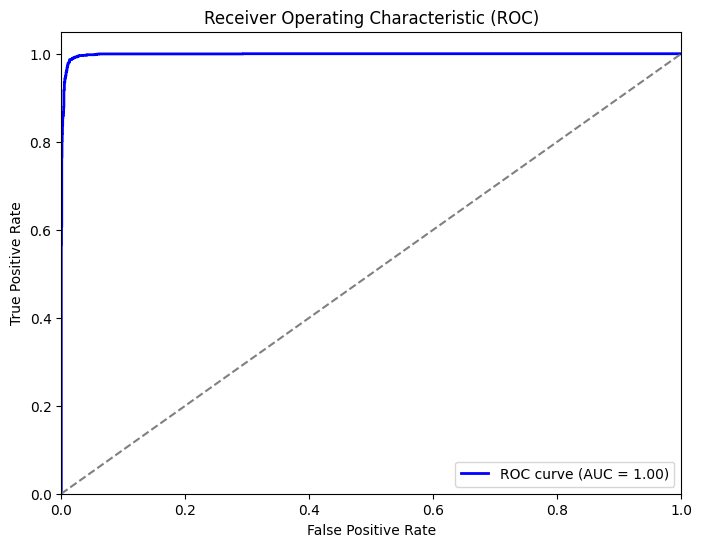

In [48]:
# Calcular a curva ROC e o AUC


fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show() #Z score

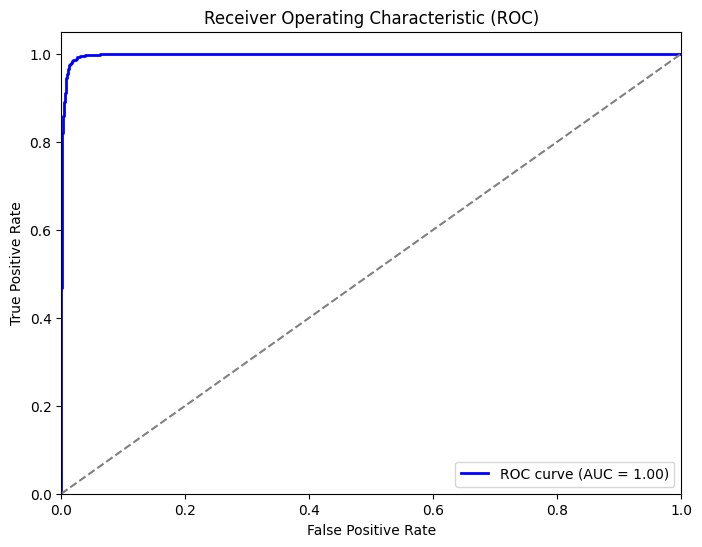

In [97]:
# Calcular a curva ROC e o AUC
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show() #Blosuum

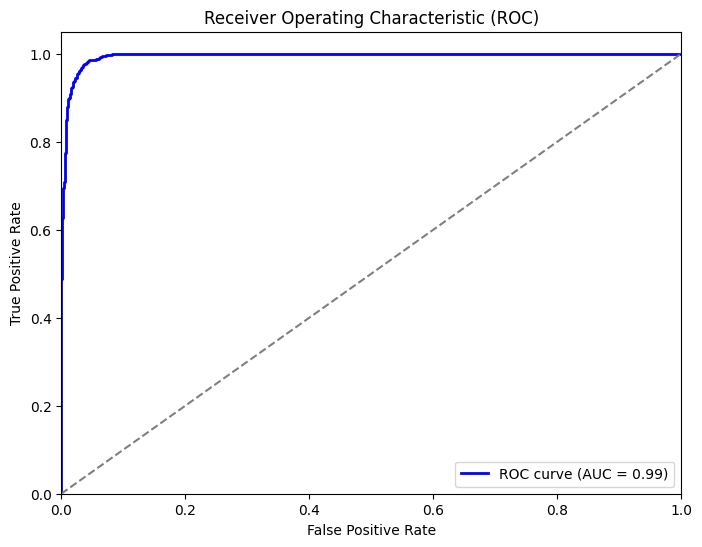

In [47]:
# Calcular a curva ROC e o AUC
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# RNN - GRU based model

In [81]:
from tensorflow.keras.layers import GRU, Dense, Dropout, Input, Flatten

model = Sequential([
    #Input(shape=(456, 5)), # z scale
    #Input(shape=(456, 23)), # blossum
    Input(shape=(456, 21)), #one hot encoding
    GRU(units=64, return_sequences=True),  
    GRU(units=32, return_sequences=True),  
    Flatten(),
    Dense(64, activation='relu'),  
    Dropout(0.3),  
    Dense(1, activation='sigmoid')
])


In [82]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', f1_m, precision_m, recall_m])

In [83]:
# Train the model
history = model.fit(X_train, y_train, batch_size=64,epochs = 100,validation_split=0.2, callbacks=[checkpoint, early_stopping])

Epoch 1/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 63s 407ms/step - accuracy: 0.9017 - f1_m: 0.8803 - loss: 0.2247 - precision_m: 0.8747 - recall_m: 0.8916 - val_accuracy: 0.9768 - val_f1_m: 0.9751 - val_loss: 0.0716 - val_precision_m: 0.9559 - val_recall_m: 0.9960
Epoch 2/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 59s 401ms/step - accuracy: 0.9806 - f1_m: 0.9790 - loss: 0.0584 - precision_m: 0.9705 - recall_m: 0.9885 - val_accuracy: 0.9832 - val_f1_m: 0.9814 - val_loss: 0.0487 - val_precision_m: 0.9767 - val_recall_m: 0.9868
Epoch 3/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 59s 401ms/step - accuracy: 0.9848 - f1_m: 0.9829 - loss: 0.0511 - precision_m: 0.9761 - recall_m: 0.9905 - val_accuracy: 0.9863 - val_f1_m: 0.9854 - val_loss: 0.0477 - val_precision_m: 0.9824 - val_recall_m: 0.9891
Epoch 4/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 59s 401ms/step - accuracy: 0.9871 - f1_m: 0.9856 - loss: 0.0424 - precision_m: 0.9821 - recall_m: 0.9898 - val_accuracy: 0.9841 - val_f1_m: 0.9825 - val_loss: 0.0502 - val_precision_m: 0.9707

In [87]:
loss, accuracy, f1_score, precision, recall = model.evaluate(x_test, y_test)


print('--------------------------------')
print("Mean Training Accuracy:", np.mean(history.history['accuracy']))
print("Mean Validation Accuracy:", np.mean(history.history['val_accuracy']))
print("Mean Training Loss:", np.mean(history.history['loss']))
print("Mean Validation Loss:", np.mean(history.history['val_loss']))
print("Mean Training F1 Score:", np.mean(history.history['f1_m']))
print("Mean Validation F1 Score:", np.mean(history.history['val_f1_m']))
print("Mean Training Precision:", np.mean(history.history['precision_m']))
print("Mean Validation Precision:", np.mean(history.history['val_precision_m']))
print("Mean Training Recall:", np.mean(history.history['recall_m']))
print("Mean Validation Recall:", np.mean(history.history['val_recall_m']))
print('--------------------------------')

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test F1 Score: {f1_score:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")

91/91 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.9873 - f1_m: 0.9850 - loss: 0.0386 - precision_m: 0.9842 - recall_m: 0.9864
--------------------------------
Mean Training Accuracy: 0.9907122435777084
Mean Validation Accuracy: 0.983041991358218
Mean Training Loss: 0.026818556873046833
Mean Validation Loss: 0.07531606584139493
Mean Training F1 Score: 0.9896606258724047
Mean Validation F1 Score: 0.9816051617912624
Mean Training Precision: 0.9868345493855684
Mean Validation Precision: 0.9757809379826421
Mean Training Recall: 0.9929477961167045
Mean Validation Recall: 0.9882767874261608
--------------------------------
Test Loss: 0.0402
Test Accuracy: 0.9880
Test F1 Score: 0.9855
Test Precision: 0.9855
Test Recall: 0.9863


In [88]:
results = model.evaluate(x_test, y_test)
print(f"Test Loss: {results[0]}")
print(f"Test Accuracy: {results[1]}")
print(f"Test Precision: {results[2]}")
print(f"Test Recall: {results[3]}")


91/91 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.9873 - f1_m: 0.9850 - loss: 0.0386 - precision_m: 0.9842 - recall_m: 0.9864
Test Loss: 0.04020757973194122
Test Accuracy: 0.9879724979400635
Test Precision: 0.9854711890220642
Test Recall: 0.9855382442474365


In [89]:

#  MCC
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)


mcc = matthews_corrcoef(y_test, y_pred)

print(f"Test MCC: {mcc:.4f}")

91/91 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step
Test MCC: 0.9758


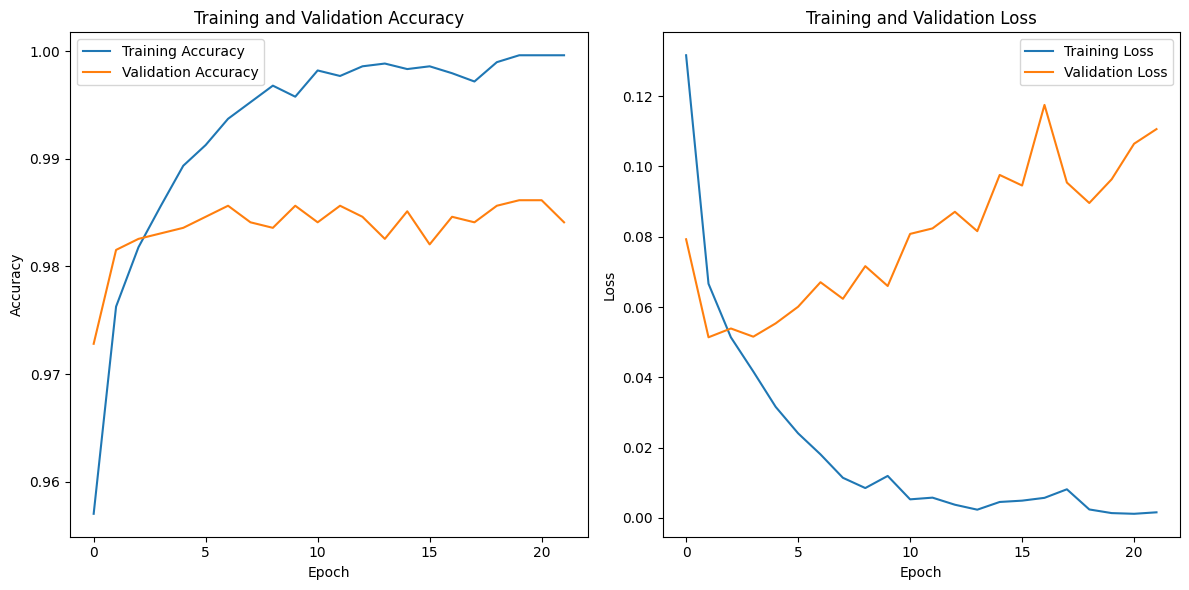

In [68]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

#Z scores

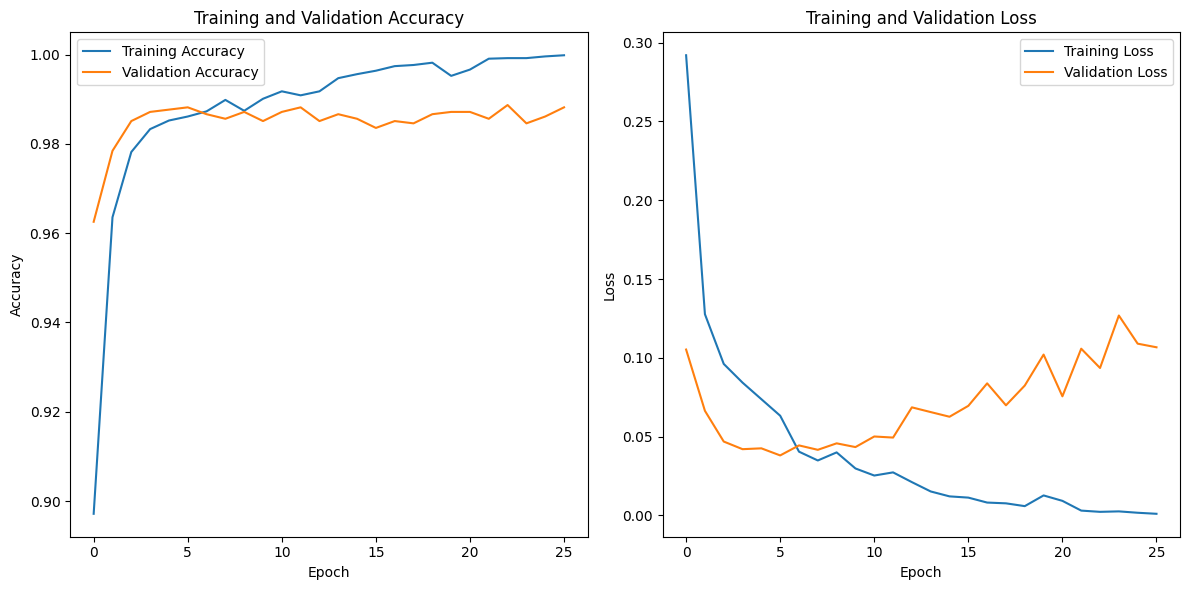

In [128]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

#blossum

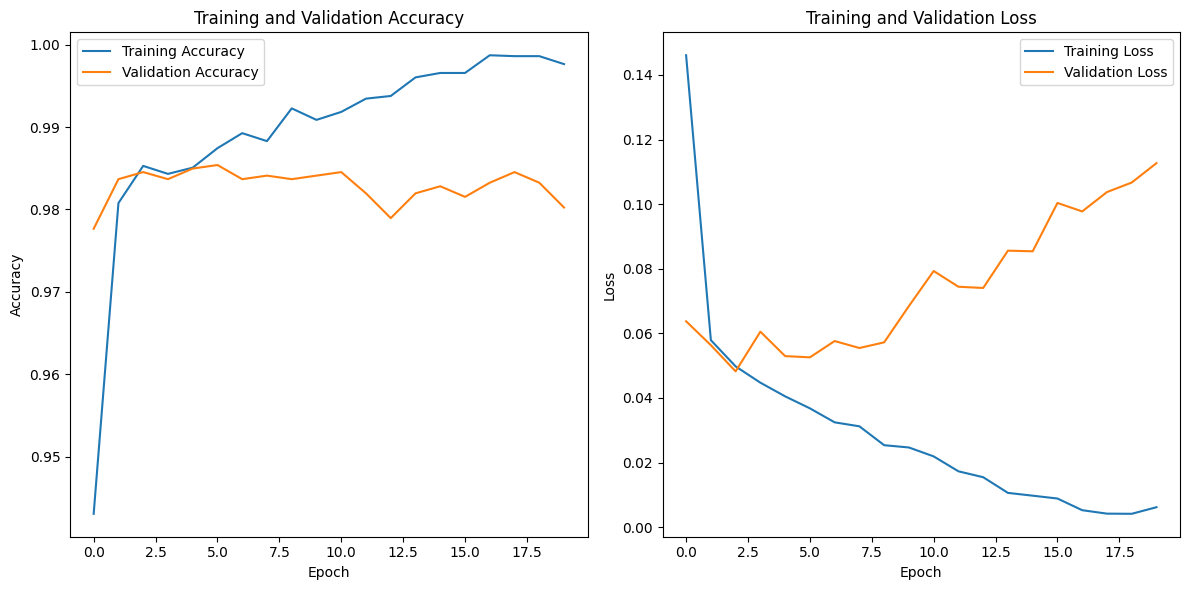

In [116]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

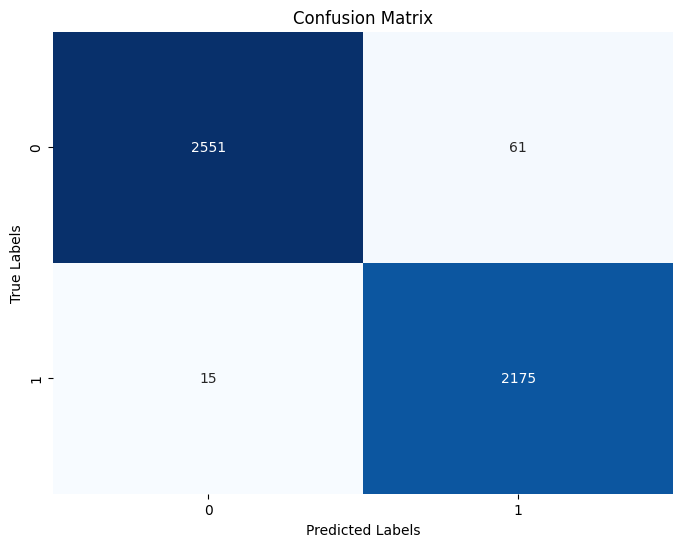

In [69]:

cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show() #Z-scores

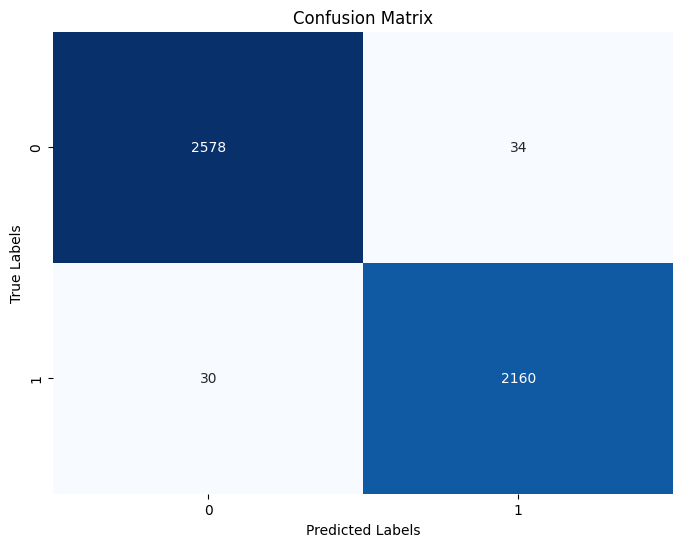

In [129]:

cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show() #blosum

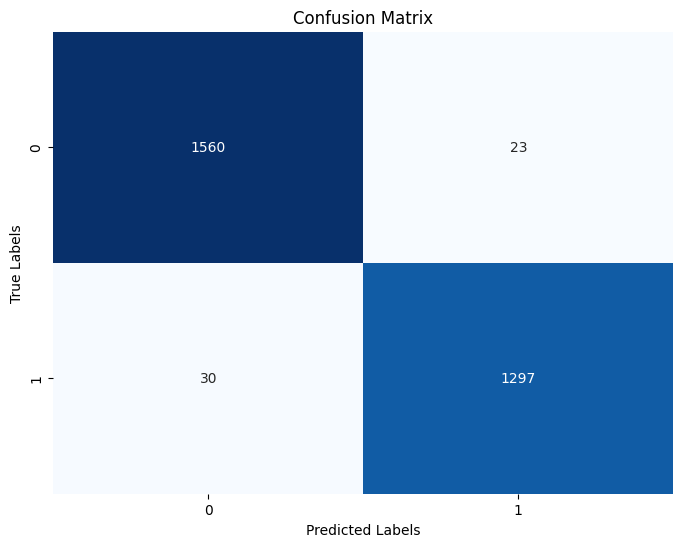

In [117]:

cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

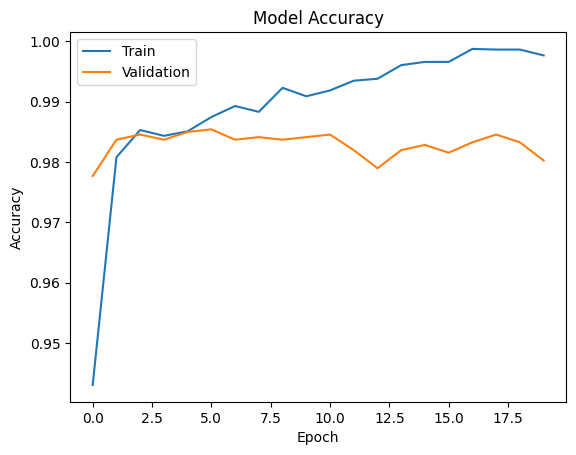

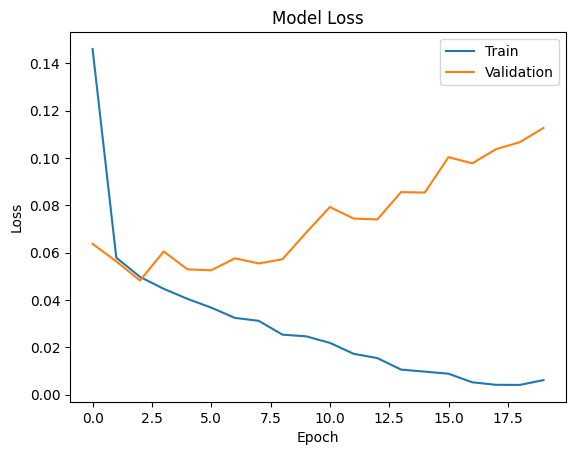

In [118]:


# Supondo que history é o objeto retornado por model.fit
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

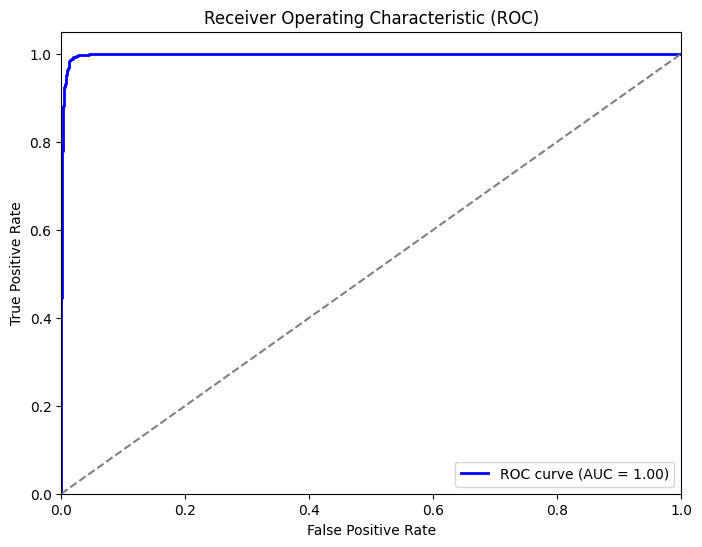

In [71]:
# Calculate the ROC curve and the AUC


fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

#Z scores

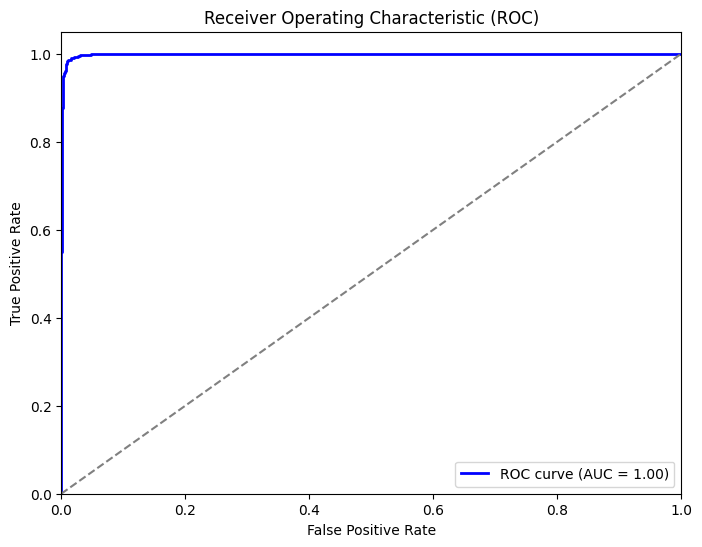

In [130]:
# Calculate the ROC curve and the AUC


fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

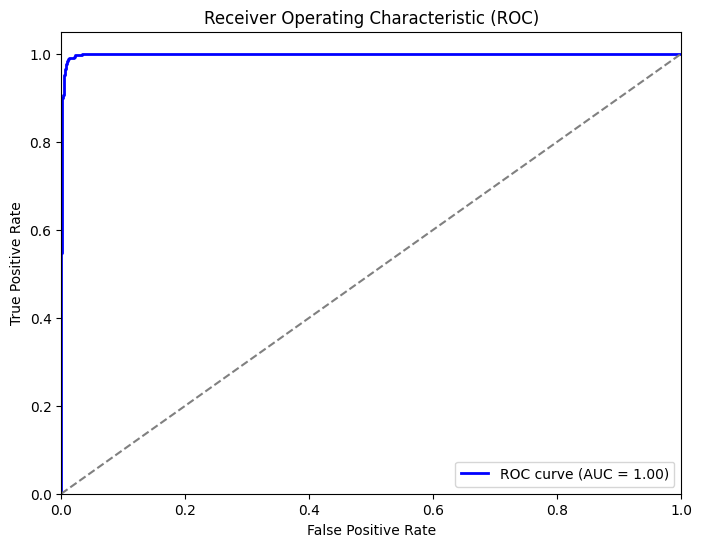

In [56]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()